In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

In [2]:
pd.reset_option('display.max_columns')

In [3]:
df = pd.read_csv(r"D:\ESCRITORIO\NUCLIO\GITHUB\archivos CSV Mobilenow\telecom_churn_TRAINTEST (1).csv")

In [4]:
dict = pd.read_csv(r"D:\ESCRITORIO\NUCLIO\GITHUB\archivos CSV Mobilenow\variable_dictionary (1).csv")

### Echamos un vistazo a nuestras variables

In [5]:
dict

,Variable,Description
0,rev,Mean monthly revenue (charge amount)
1,mou,Mean number of monthly minutes of use
2,totmrc,Mean total monthly recurring charge
3,da,Mean number of directory assisted calls
4,ovrmou,Mean overage minutes of use
5,ovrrev,Mean overage revenue
6,vceovr,Mean revenue of voice overage
7,datovr,Mean revenue of data overage
8,roam,Mean number of roaming calls
9,change_mou,Percentage change in monthly minutes of use v...


In [6]:
df

### Aplicamos funcion para eliminar las filas de las columnas que tenga un numero de nulos inferior al 5%

In [ ]:
for i in df.columns:
    if (df[i].isnull().sum() / len(df)) < 0.05:
        df.dropna(subset=[i], inplace=True)

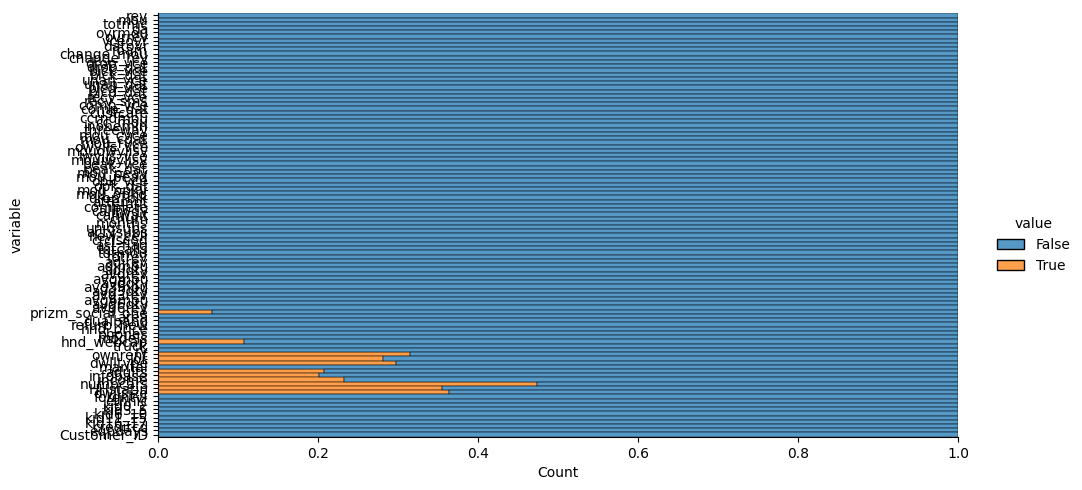

In [ ]:
#comprobamos resultado de nuestra funcion
df.isnull().melt().pipe(lambda df: (sns.displot(
    data=df,
    y='variable',
    hue='value',
    multiple='fill',
    aspect=2
)))

In [ ]:
df["marital"].unique

### Vemos que columnas siguen con nulos. Vamos a ir tratandolas una a una

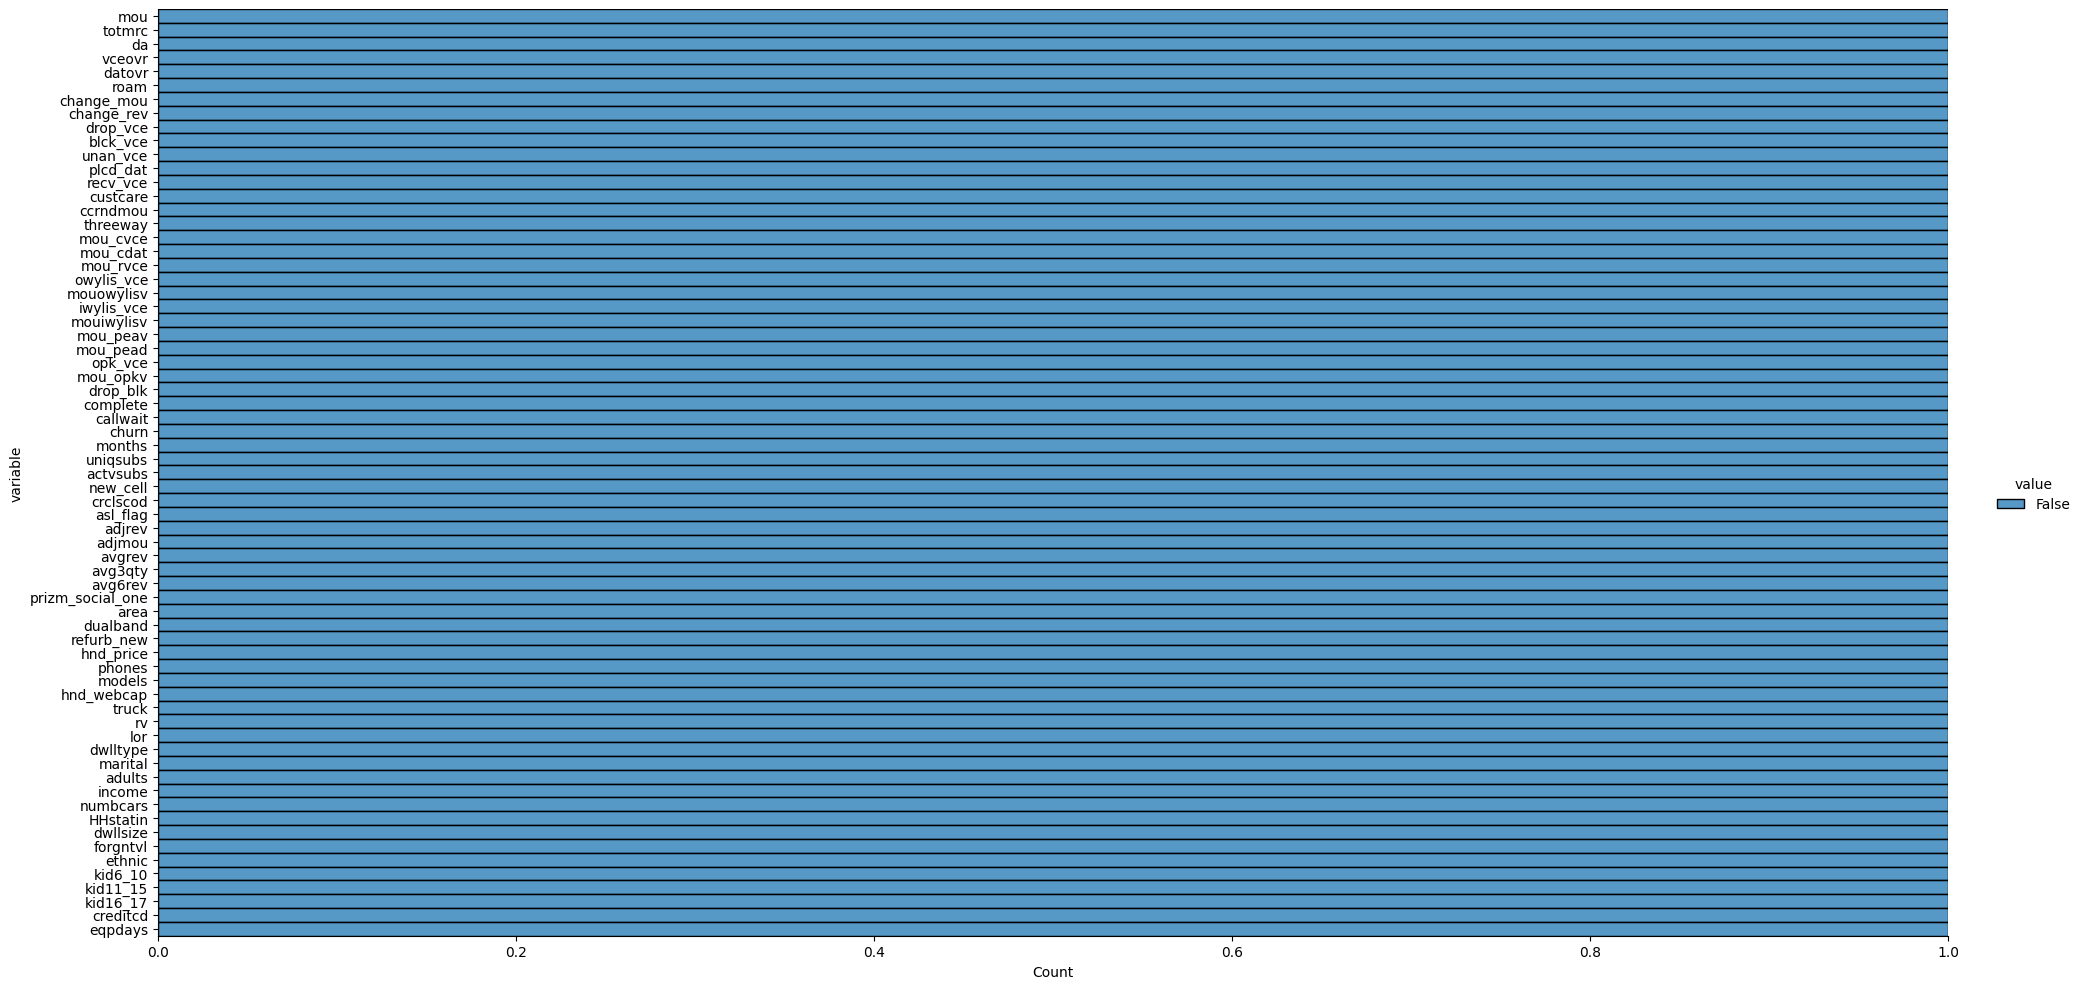

In [ ]:
#Visualizamos la proporción de nulos existentes en nuestro Dataset
df.isnull().melt().pipe(lambda df: (sns.displot(
    data=df,
    y='variable',
    hue='value',
    multiple='fill',
    aspect=2, height=10
)))

In [ ]:
for i in df.columns:
    if (df[i].isnull().sum() / len(df)) > 0.05:
        print(i)
       

prizm_social_one
hnd_webcap
ownrent
lor
dwlltype
adults
infobase
income
numbcars
HHstatin
dwllsize


## Gestion de nulos

#### Analisis univariable

In [ ]:
variables_to_analyze = ["prizm_social_one","hnd_webcap","ownrent","lor","dwlltype","adults","infobase","income","numbcars","HHstatin","dwllsize"]


In [ ]:
def analyze_variables(df, variables):
    results = {}
    for var in variables:
        results[var] = {
            'Unique values': df[var].unique(),
            'Null values': df[var].isnull().sum(),
            'Value counts (normalized)': df[var].value_counts(normalize=True)
        }
    return results

In [ ]:
# Llamar a la función para realizar el análisis
analysis_results = analyze_variables(df, variables_to_analyze)

# Mostrar los resultados
for var, results in analysis_results.items():
    print(f"Análisis para la variable '{var}':")
    print(f"Unique values: {results['Unique values']}")
    print(f"Null values: {results['Null values']}")
    print(f"Value counts (normalized):\n{results['Value counts (normalized)']}\n")

Análisis para la variable 'prizm_social_one':
Unique values: ['S' 'T' 'U' 'C' nan 'R']
Null values: 5755
Value counts (normalized):
prizm_social_one
S    0.350044
U    0.250605
C    0.181963
T    0.164787
R    0.052601
Name: proportion, dtype: float64

Análisis para la variable 'hnd_webcap':
Unique values: ['WCMB' nan 'WC']
Null values: 9253
Value counts (normalized):
hnd_webcap
WCMB    0.843072
WC      0.156928
Name: proportion, dtype: float64

Análisis para la variable 'ownrent':
Unique values: ['O' nan 'R']
Null values: 27041
Value counts (normalized):
ownrent
O    0.970467
R    0.029533
Name: proportion, dtype: float64

Análisis para la variable 'lor':
Unique values: [15.  7.  6.  5.  1.  8.  0.  3.  4. 11. 10. 13. nan  2. 14. 12.  9.]
Null values: 24140
Value counts (normalized):
lor
1.0     0.144760
2.0     0.127507
15.0    0.117407
3.0     0.083564
4.0     0.077624
5.0     0.070017
6.0     0.064109
7.0     0.061390
8.0     0.052343
9.0     0.042405
10.0    0.033244
0.0     0.031

In [ ]:
# para esta variable solo eliminamos las filas con nulos
df.dropna(subset=["prizm_social_one"], inplace=True)

In [ ]:
# aqui rellenamos los nulos por "sin", aunque a lo mejor nos la cargamos pues el 85% de los valores no nulos lo abarca un solo valor, por lo que pensamos que aporta poca info
df["hnd_webcap"].fillna("sin", inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_19220\3079051767.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["hnd_webcap"].fillna("sin", inplace=True)


In [ ]:
# eliminamos columna pues aporta poca info porque el 97% de los valores no nulos los ocupa un solo valor
del(df["ownrent"])

In [ ]:
def rellenar_nulos_proporcion(df, columna):
    # Obtener la distribución de valores no nulos
    distribucion = df[columna].value_counts(normalize=True)
    
    # Reemplazar valores nulos con una elección aleatoria basada en la distribución
    df[columna] = df[columna].apply(
        lambda x: np.random.choice(distribucion.index, p=distribucion.values) if pd.isnull(x) else x
    )
    
    return df

In [ ]:
# Rellenar los valores nulos de la columna 'categoria'
df = rellenar_nulos_proporcion(df, 'lor')

In [ ]:
df["lor"].value_counts(normalize=True)

lor
1.0     0.144094
2.0     0.127167
15.0    0.118698
3.0     0.083959
4.0     0.077560
5.0     0.069627
6.0     0.064214
7.0     0.060945
8.0     0.053062
9.0     0.043096
10.0    0.033629
0.0     0.030099
11.0    0.028240
13.0    0.024224
12.0    0.023774
14.0    0.017613
Name: proportion, dtype: float64

In [ ]:
# aqui rellenamos los nulos por "sin"
# df["dwlltype"].fillna("sin", inplace=True)

In [ ]:
# Rellenar los valores nulos de la columna 'categoria'
df = rellenar_nulos_proporcion(df, 'dwlltype')

In [ ]:
# eliminamos porque solo 1 valor
del(df["infobase"])

In [ ]:
#rellenamos con media redondeando a cero decimales
df["adults"].fillna(df["adults"].mean().round(decimals=0), inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_19220\71565980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["adults"].fillna(df["adults"].mean().round(decimals=0), inplace=True)


In [ ]:
#rellenamos con media
df["income"].fillna(df["income"].mean().round(decimals=0), inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_19220\736500535.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["income"].fillna(df["income"].mean().round(decimals=0), inplace=True)


In [ ]:
#rellenamos con "sin"
#df["HHstatin"].fillna("sin", inplace=True)

In [ ]:
# Rellenar los valores nulos de la columna 'categoria'
df = rellenar_nulos_proporcion(df, 'HHstatin')

In [ ]:
# rellenamos con "sin", pero habra que pensar luego si nos cargamos las filas o que hacemos por mejorar el modelo
df["numbcars"].fillna("sin", inplace=True)

C:\Users\rafas\AppData\Local\Temp\ipykernel_19220\3333155465.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["numbcars"].fillna("sin", inplace=True)
C:\Users\rafas\AppData\Local\Temp\ipykernel_19220\3333155465.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'sin' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["numbcars"].fillna("sin", inplace=True)


In [ ]:
# rellenamos con "sin", pero habra que pensar luego si nos cargamos la columna 
#df["dwllsize"].fillna("sin", inplace=True)

In [ ]:
df = rellenar_nulos_proporcion(df, 'dwllsize')

In [ ]:
df.isnull().sum()  # ya no tenemos nulos

rev                 0
mou                 0
totmrc              0
da                  0
ovrmou              0
ovrrev              0
vceovr              0
datovr              0
roam                0
change_mou          0
change_rev          0
drop_vce            0
drop_dat            0
blck_vce            0
blck_dat            0
unan_vce            0
unan_dat            0
plcd_vce            0
plcd_dat            0
recv_vce            0
recv_sms            0
comp_vce            0
comp_dat            0
custcare            0
ccrndmou            0
cc_mou              0
inonemin            0
threeway            0
mou_cvce            0
mou_cdat            0
mou_rvce            0
owylis_vce          0
mouowylisv          0
iwylis_vce          0
mouiwylisv          0
peak_vce            0
peak_dat            0
mou_peav            0
mou_pead            0
opk_vce             0
opk_dat             0
mou_opkv            0
mou_opkd            0
drop_blk            0
attempt             0
complete  

### Vemos si tenemos duplicados

In [ ]:
df.duplicated(keep=False).value_counts() # no hay duplicados


False    80170
Name: count, dtype: int64

###     Función que realiza un conteo de valores normalizado por cada columna del DataFrame.
###     Si encuentra una columna donde un valor se repite más del 95% de las veces,
###     imprime el nombre de la columna y elimina dicha columna del DataFrame.

In [ ]:

def analyze_and_remove_highly_repeated_columns(df, threshold=0.95):
    

   
    for col in df.columns:
        value_counts_normalized = df[col].value_counts(normalize=True)
        
        # Verificar si hay algún valor que supere el umbral
        if any(value_counts_normalized > threshold):
            print(f"Columna '{col}' tiene un valor que se repite más del {threshold * 100}% de las veces.")
            print(f"Valores y sus frecuencias:\n{value_counts_normalized}\n")
            
            # Eliminar la columna del DataFrame original
            df.drop(columns=[col], inplace=True)
            print(f"Columna '{col}' eliminada del DataFrame.\n")

In [ ]:
analyze_and_remove_highly_repeated_columns(df, threshold=0.95)

Columna 'drop_dat' tiene un valor que se repite más del 95.0% de las veces.
Valores y sus frecuencias:
drop_dat
0.000000      0.976288
0.333333      0.010141
0.666667      0.004802
1.000000      0.002120
1.333333      0.001597
1.666667      0.000898
2.000000      0.000649
2.333333      0.000462
2.666667      0.000349
3.000000      0.000312
3.333333      0.000274
4.000000      0.000249
3.666667      0.000187
5.000000      0.000175
4.333333      0.000137
5.333333      0.000125
4.666667      0.000100
6.000000      0.000100
6.333333      0.000087
5.666667      0.000075
9.333333      0.000075
7.333333      0.000075
6.666667      0.000062
8.333333      0.000050
7.000000      0.000050
8.000000      0.000050
9.666667      0.000037
10.000000     0.000037
10.666667     0.000037
12.000000     0.000025
13.000000     0.000025
11.000000     0.000025
20.666667     0.000012
7.666667      0.000012
8.666667      0.000012
11.333333     0.000012
15.000000     0.000012
13.333333     0.000012
25.333333     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80170 entries, 0 to 89998
Data columns (total 91 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               80170 non-null  float64
 1   mou               80170 non-null  float64
 2   totmrc            80170 non-null  float64
 3   da                80170 non-null  float64
 4   ovrmou            80170 non-null  float64
 5   ovrrev            80170 non-null  float64
 6   vceovr            80170 non-null  float64
 7   datovr            80170 non-null  float64
 8   roam              80170 non-null  float64
 9   change_mou        80170 non-null  float64
 10  change_rev        80170 non-null  float64
 11  drop_vce          80170 non-null  float64
 12  blck_vce          80170 non-null  float64
 13  unan_vce          80170 non-null  float64
 14  plcd_vce          80170 non-null  float64
 15  plcd_dat          80170 non-null  float64
 16  recv_vce          80170 non-null  float64
 17

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
new_cell,80170,3,U,52157
crclscod,80170,52,AA,30799
asl_flag,80170,2,N,71262
prizm_social_one,80170,5,S,28063
area,80170,19,NEW YORK CITY AREA,9421
dualband,80170,3,Y,59153
refurb_new,80170,2,N,68055
hnd_webcap,80170,3,WCMB,60193
dwlltype,80170,2,S,57533
marital,80170,5,U,28522


In [ ]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
rev,80170.0,5.784749e+01,45.809018,-5.862500e+00,3.290250e+01,4.720375e+01,6.933500e+01,3.843262e+03
mou,80170.0,4.981216e+02,512.353888,0.000000e+00,1.467500e+02,3.442500e+02,6.775000e+02,1.220675e+04
totmrc,80170.0,4.572138e+01,23.199181,-2.691500e+01,3.000000e+01,4.499000e+01,5.999000e+01,4.099900e+02
da,80170.0,8.657880e-01,2.155904,0.000000e+00,0.000000e+00,2.475000e-01,7.425000e-01,1.593900e+02
ovrmou,80170.0,4.004568e+01,96.237659,0.000000e+00,0.000000e+00,2.500000e+00,4.000000e+01,4.320750e+03
ovrrev,80170.0,1.303391e+01,29.762019,0.000000e+00,0.000000e+00,8.750000e-01,1.353063e+01,1.102400e+03
vceovr,80170.0,1.279637e+01,29.349625,0.000000e+00,0.000000e+00,5.250000e-01,1.320000e+01,8.960875e+02
datovr,80170.0,2.350482e-01,2.961397,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.235400e+02
roam,80170.0,1.265089e+00,15.945516,0.000000e+00,0.000000e+00,0.000000e+00,2.575000e-01,3.685200e+03
change_mou,80170.0,-1.388623e+01,270.741901,-3.406500e+03,-8.475000e+01,-6.500000e+00,6.000000e+01,3.121925e+04


In [ ]:
def columnas_con_min_negativo(df):
    # Obtener la descripción de las columnas numéricas
    descripcion = df.describe(include=[np.number]).T
    
    # Filtrar las columnas que tienen valores negativos en "min"
    columnas_negativas = descripcion[descripcion['min'] < 0].index.tolist()
    
    return columnas_negativas

In [ ]:
columnas_negativas = columnas_con_min_negativo(df)

In [ ]:
columnas_negativas

['rev', 'totmrc', 'change_mou', 'change_rev', 'avg6rev', 'eqpdays']

In [ ]:
df.drop(df[df["rev"]<0].index, inplace=True)

In [ ]:
df[df["avg6rev"]<0]

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,...,HHstatin,dwllsize,forgntvl,ethnic,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
19095,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,A,A,0.0,N,U,U,U,Y,751.0,1019096


In [ ]:
df.drop(df[df["avg6rev"]<0].index, inplace=True)

In [ ]:
df[df["eqpdays"]<0]

,rev,mou,totmrc,da,ovrmou,ovrrev,vceovr,datovr,roam,change_mou,...,HHstatin,dwllsize,forgntvl,ethnic,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
1371,77.1625,413.25,70.0000,0.7425,0.00,0.0000,0.0000,0.0000,1.9200,208.75,...,C,B,0.0,N,U,U,U,Y,-1.0,1001372
3631,45.5100,666.00,44.9900,0.0000,26.00,9.1000,9.1000,0.0000,0.3200,35.00,...,C,A,0.0,Z,U,U,U,N,-1.0,1003632
4191,88.9800,1.00,49.9900,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.00,...,C,A,0.0,H,U,Y,Y,Y,-1.0,1004192
7581,62.1725,838.75,81.0375,0.2475,0.00,0.0000,0.0000,0.0000,0.0000,138.25,...,A,A,0.0,U,U,U,U,N,-3.0,1007582
8463,36.5200,147.75,44.9900,1.2375,0.00,0.0000,0.0000,0.0000,0.2925,-124.75,...,I,B,0.0,N,U,U,U,Y,-2.0,1008464
10043,116.2625,2179.25,74.9925,5.4450,68.50,26.3500,26.3500,0.0000,0.0000,-287.25,...,C,A,0.0,N,U,U,U,N,-2.0,1010044
12695,29.9900,119.75,39.9900,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,105.25,...,I,A,1.0,I,U,U,U,Y,-2.0,1012696
12981,117.0750,1237.75,74.9900,0.9900,25.75,10.2975,10.2000,0.0975,15.1575,-257.75,...,C,A,0.0,H,U,U,U,Y,-3.0,1012982
14575,111.0625,868.25,75.0000,14.6025,1.00,0.3900,0.0000,0.3900,0.5850,-39.25,...,C,A,0.0,N,U,U,U,Y,-2.0,1014576
16656,46.4775,463.50,34.9800,0.2475,37.50,11.2500,11.2500,0.0000,0.0000,6.50,...,C,A,0.0,N,U,Y,Y,Y,-4.0,1016657


In [ ]:
df.drop(df[df["eqpdays"]<0].index, inplace=True)

In [ ]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
rev,80107.0,5.782858e+01,45.788114,0.000000e+00,3.289000e+01,4.718000e+01,6.932500e+01,3.843262e+03
mou,80107.0,4.977636e+02,511.821764,0.000000e+00,1.467500e+02,3.442500e+02,6.770000e+02,1.220675e+04
totmrc,80107.0,4.571470e+01,23.193165,-2.691500e+01,3.000000e+01,4.499000e+01,5.999000e+01,4.099900e+02
da,80107.0,8.650167e-01,2.152229,0.000000e+00,0.000000e+00,2.475000e-01,7.425000e-01,1.593900e+02
ovrmou,80107.0,4.002280e+01,96.189087,0.000000e+00,0.000000e+00,2.500000e+00,4.000000e+01,4.320750e+03
ovrrev,80107.0,1.302647e+01,29.744943,0.000000e+00,0.000000e+00,8.750000e-01,1.352875e+01,1.102400e+03
vceovr,80107.0,1.278888e+01,29.331906,0.000000e+00,0.000000e+00,5.250000e-01,1.320000e+01,8.960875e+02
datovr,80107.0,2.350880e-01,2.962521,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.235400e+02
roam,80107.0,1.264776e+00,15.951218,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e-01,3.685200e+03
change_mou,80107.0,-1.388165e+01,270.689281,-3.406500e+03,-8.450000e+01,-6.500000e+00,6.000000e+01,3.121925e+04


In [ ]:
corr = df.corr(numeric_only=True)

In [ ]:
# Filtrar las correlaciones mayores a 0.89
high_corr_pairs = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack()
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.89]

# Obtener la correlación de todas las variables con "churn"
churn_corr = corr['churn']

# Crear la tabla de resultados
results = []

for (var1, var2), corr_value in high_corr_pairs.items():
    results.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'Correlation': corr_value,
        'Correlation with churn (Variable 1)': churn_corr.get(var1, np.nan),
        'Correlation with churn (Variable 2)': churn_corr.get(var2, np.nan)
    })

results_df = pd.DataFrame(results)

# Mostrar la tabla
print("Variables correlacionadas entre sí más de 0.89 y su relación con 'churn':")
print(results_df.to_string(index=False))

Variables correlacionadas entre sí más de 0.89 y su relación con 'churn':
Variable 1 Variable 2  Correlation  Correlation with churn (Variable 1)  Correlation with churn (Variable 2)
       rev    avg3rev     0.925486                            -0.015386                            -0.018474
       mou    avg3mou     0.982627                            -0.058626                            -0.051675
       mou    avg6mou     0.947253                            -0.058626                            -0.043619
    ovrmou     ovrrev     0.956920                             0.015243                             0.020490
    ovrmou     vceovr     0.954452                             0.015243                             0.020650
    ovrrev     vceovr     0.995054                             0.020490                             0.020650
  plcd_vce   comp_vce     0.985641                            -0.044800                            -0.048202
  plcd_vce   peak_vce     0.890153                    

In [ ]:
# Filtrar las correlaciones mayores a 0.90
high_corr_pairs = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack()
high_corr_pairs = high_corr_pairs[high_corr_pairs.abs() > 0.90]

# Obtener la correlación de todas las variables con "churn"
churn_corr = corr['churn']

# Crear la lista de columnas a eliminar
columns_to_drop = set()

for (var1, var2), corr_value in high_corr_pairs.items():
    corr_with_churn_var1 = churn_corr.get(var1, np.nan)
    corr_with_churn_var2 = churn_corr.get(var2, np.nan)
    
    # Eliminar la columna con menor correlación absoluta con churn
    if abs(corr_with_churn_var1) > abs(corr_with_churn_var2):
        columns_to_drop.add(var2)
    else:
        columns_to_drop.add(var1)



In [ ]:

columns_to_drop

{'Customer_ID',
 'adjqty',
 'attempt',
 'avg3mou',
 'avg3rev',
 'avg6mou',
 'avg6qty',
 'avgmou',
 'avgqty',
 'cc_mou',
 'comp_dat',
 'comp_vce',
 'inonemin',
 'mou_opkd',
 'opk_dat',
 'ovrmou',
 'ovrrev',
 'peak_dat',
 'peak_vce',
 'plcd_vce',
 'rev',
 'totcalls',
 'totmou',
 'totrev'}

In [ ]:
for i in columns_to_drop:
    df.drop(i, axis=1, inplace=True)

In [ ]:
df.shape

(80107, 67)

In [ ]:
# separamos las variables categoricas y numericas

target=['churn']
def get_list_var(dataset):
    list_numbers=[]
    list_booleans=[]
    list_categories=[]

    for i in dataset:
      if (i not in target) and (dataset[i].dtype.kind == 'i' or dataset[i].dtype.kind == 'f') and (len(dataset[i].unique()) != 2):
        list_numbers.append(i)
      elif (i not in target) and (dataset[i].dtype.kind == 'b') and (len(dataset[i].unique())==2):
        list_booleans.append(i)
      elif (dataset[i].dtype.kind != 'o' and (i not in target)):
        list_categories.append(i)

    return list_numbers, list_booleans, list_categories

In [ ]:
l_numericas, l_booleanos, l_categoricas = get_list_var(df)

In [ ]:
l_categoricas

['new_cell',
 'crclscod',
 'asl_flag',
 'prizm_social_one',
 'area',
 'dualband',
 'refurb_new',
 'hnd_webcap',
 'truck',
 'rv',
 'dwlltype',
 'marital',
 'numbcars',
 'HHstatin',
 'dwllsize',
 'forgntvl',
 'ethnic',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [ ]:
def analyze_variables(df, variables):
    results = {}
    for var in variables:
        results[var] = {
            'Unique values': df[var].unique(),
            'Null values': df[var].isnull().sum(),
            'Value counts (normalized)': df[var].value_counts(normalize=True)
        }
    return results

In [ ]:
# Llamar a la función para realizar el análisis
analysis_results = analyze_variables(df, l_categoricas)

# Mostrar los resultados
for var, results in analysis_results.items():
    print(f"Análisis para la variable '{var}':")
    print(f"Unique values: {results['Unique values']}")
    print(f"Null values: {results['Null values']}")
    print(f"Value counts (normalized):\n{results['Value counts (normalized)']}\n")

Análisis para la variable 'new_cell':
Unique values: ['U' 'Y' 'N']
Null values: 0
Value counts (normalized):
new_cell
U    0.650542
Y    0.202904
N    0.146554
Name: proportion, dtype: float64

Análisis para la variable 'crclscod':
Unique values: ['A' 'C' 'B' 'BA' 'D' 'G' 'CA' 'AA' 'Z' 'E' 'EA' 'U' 'J' 'E4' 'W' 'DA' 'Y'
 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'K' 'B2' 'Z1' 'O' 'M' 'U1' 'Z4' 'A2'
 'V' 'I' 'TP' 'EM' 'C2' 'C5' 'Z5' 'D2' 'GY' 'E2' 'A3' 'V1' 'CY' 'EC' 'Z2'
 'ZY' 'P1' 'IF' 'ZF' 'EF']
Null values: 0
Value counts (normalized):
crclscod
AA    0.384261
A     0.178549
BA    0.124109
CA    0.080380
EA    0.060769
B     0.042268
DA    0.034778
ZA    0.034566
C     0.016029
A2    0.008726
U     0.004594
E     0.003670
GA    0.002909
E4    0.002896
G     0.002659
D     0.002634
JF    0.002122
Z     0.002072
M     0.001735
C2    0.001585
I     0.001136
D4    0.000999
W     0.000886
Z4    0.000836
U1    0.000612
EM    0.000537
V1    0.000499
B2    0.000437
EC    0.000262
O     0.000250
J   

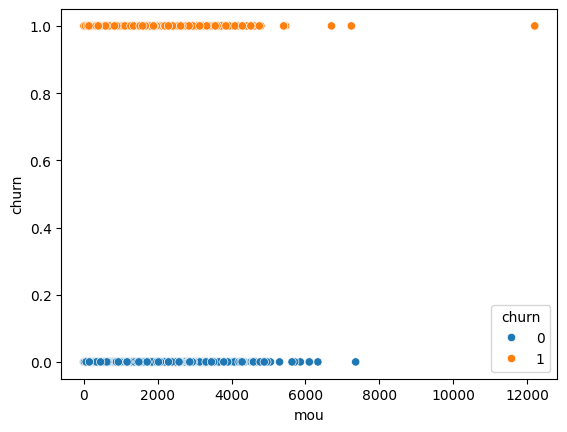

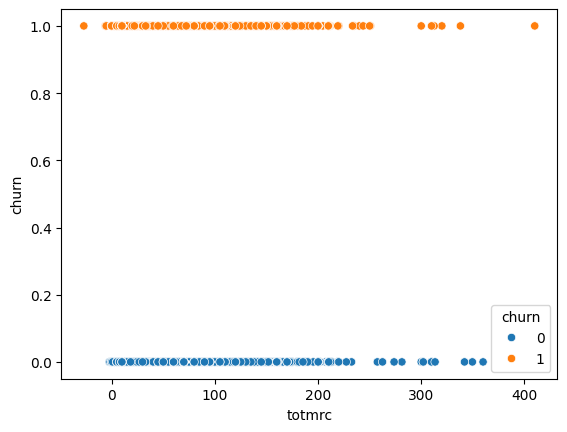

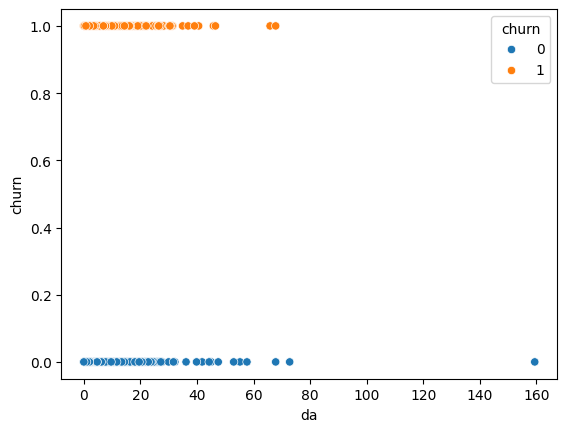

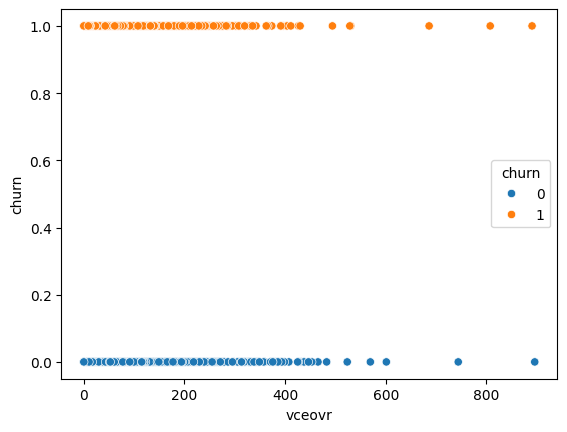

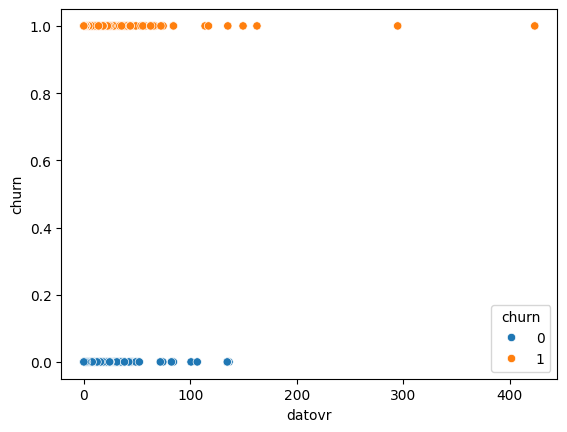

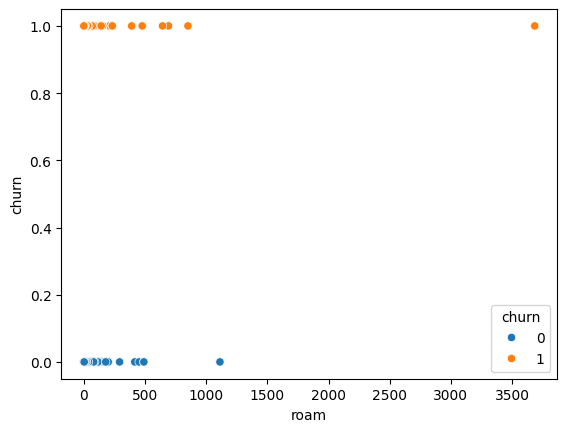

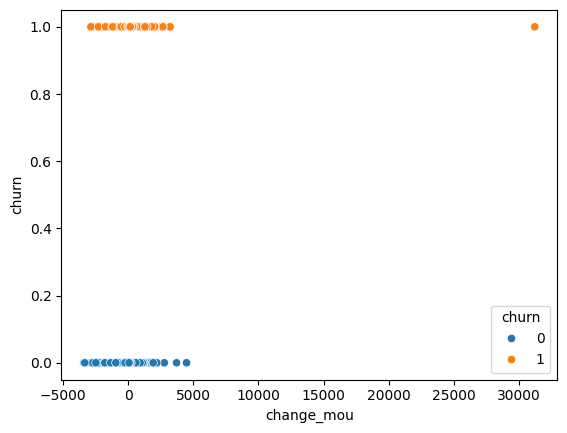

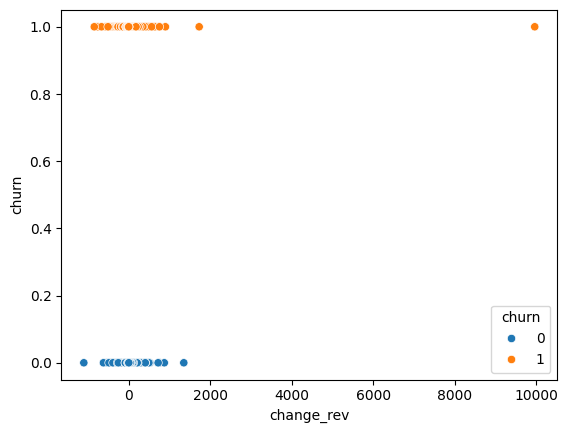

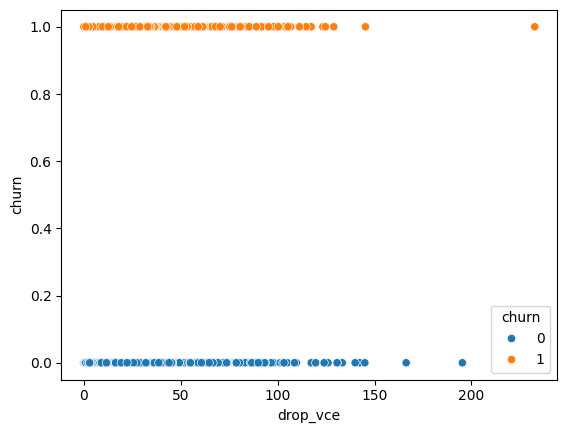

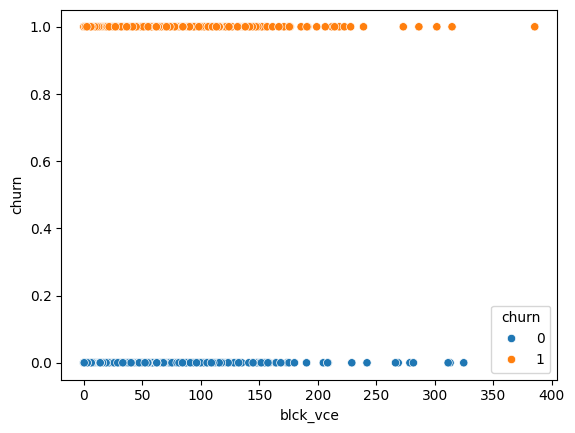

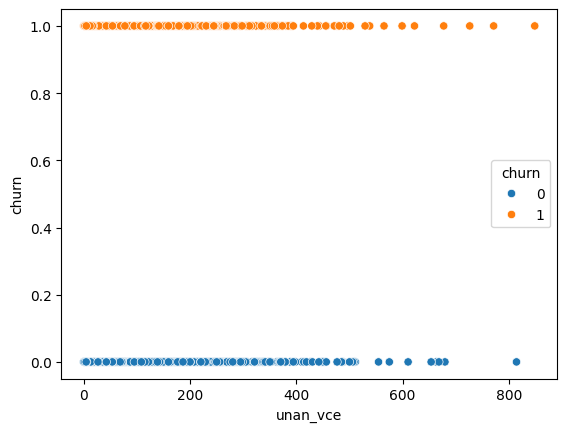

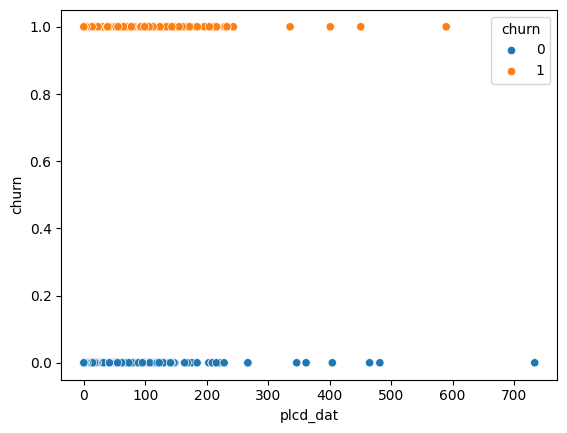

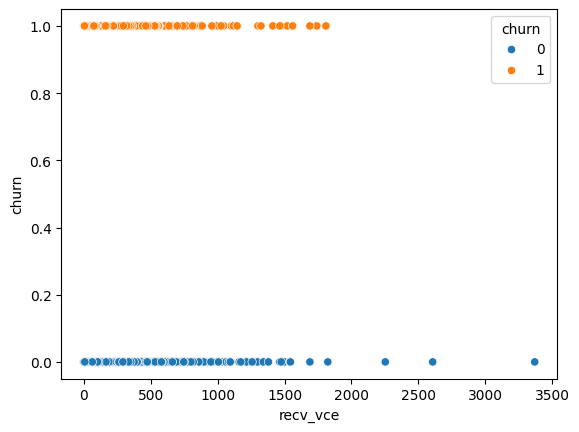

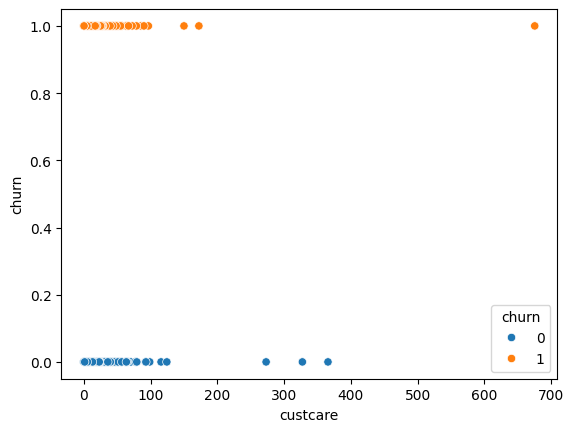

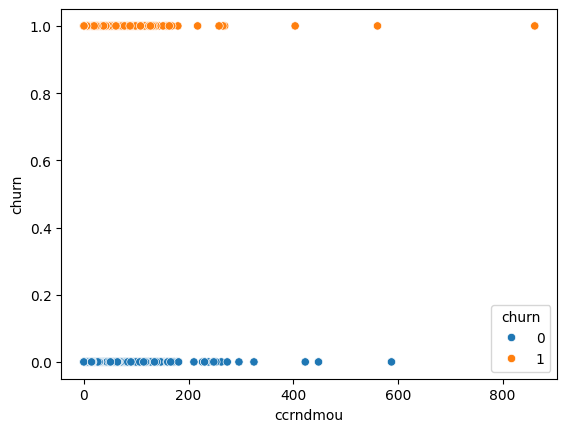

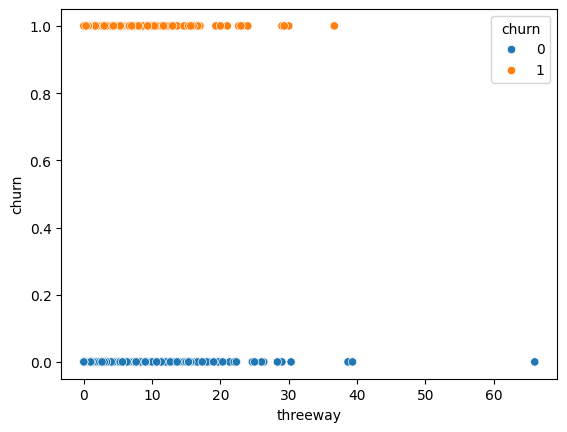

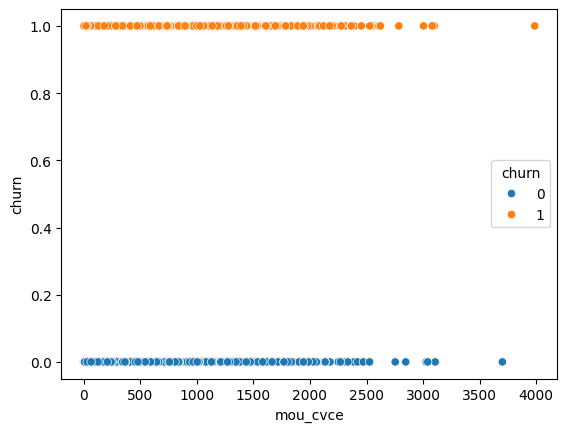

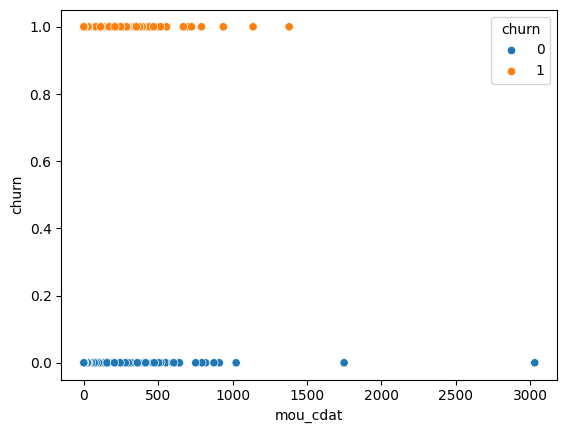

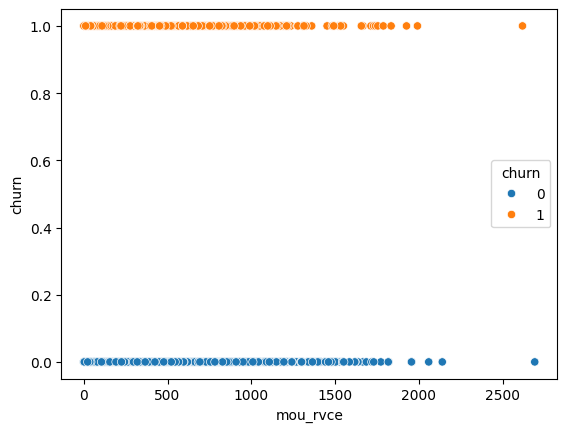

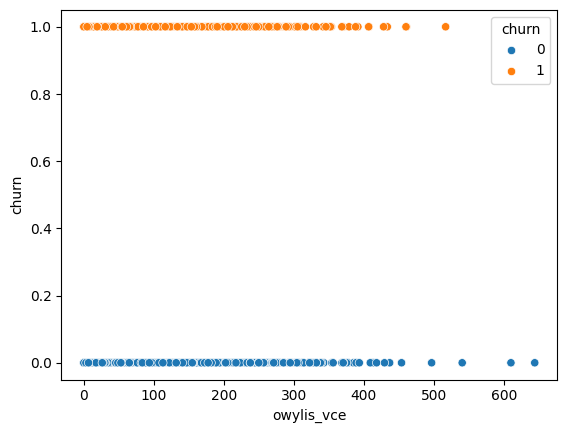

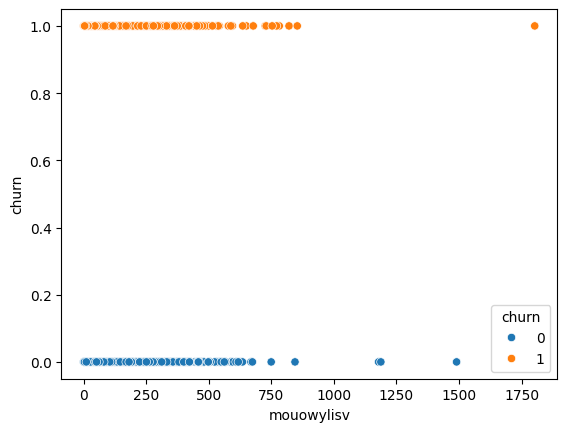

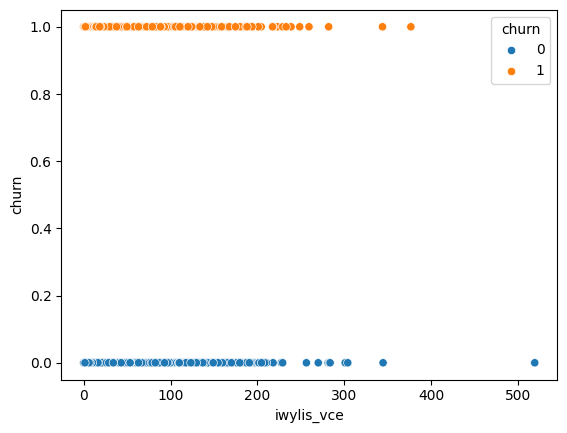

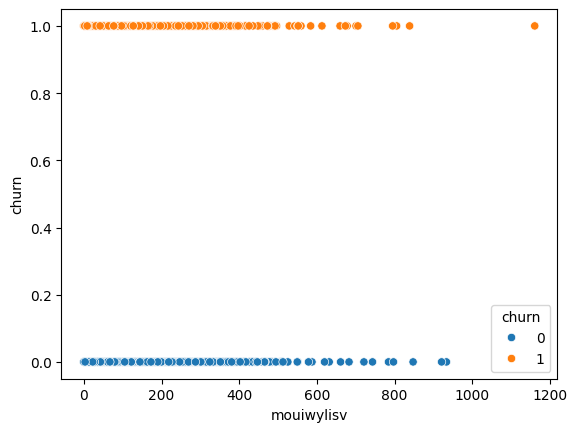

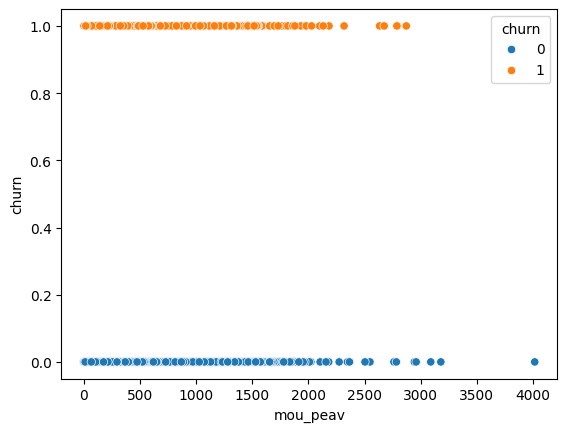

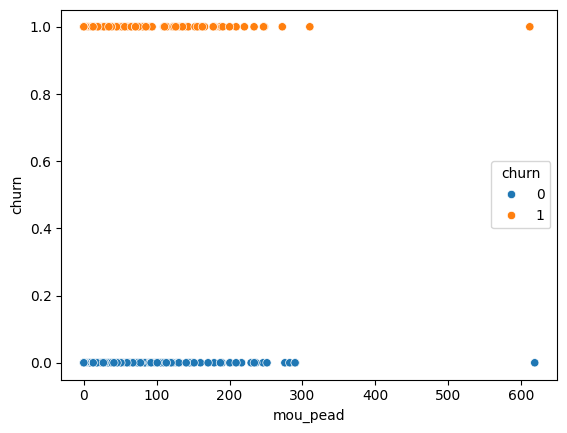

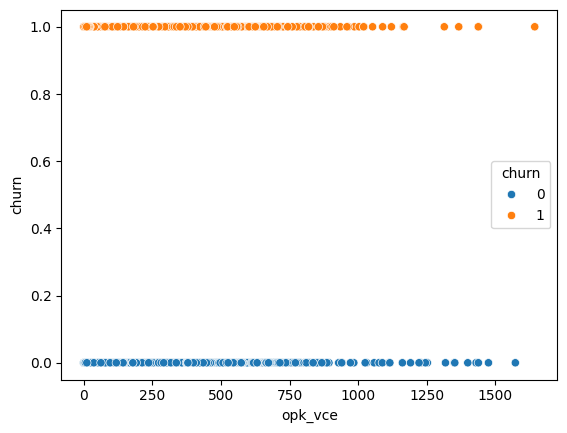

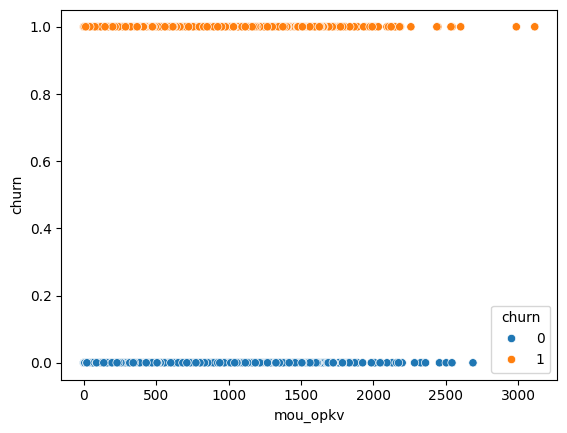

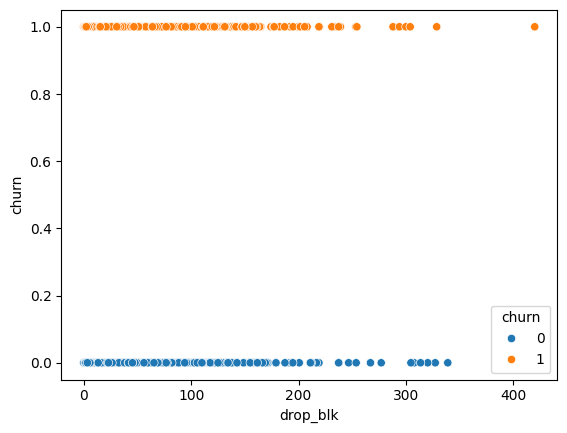

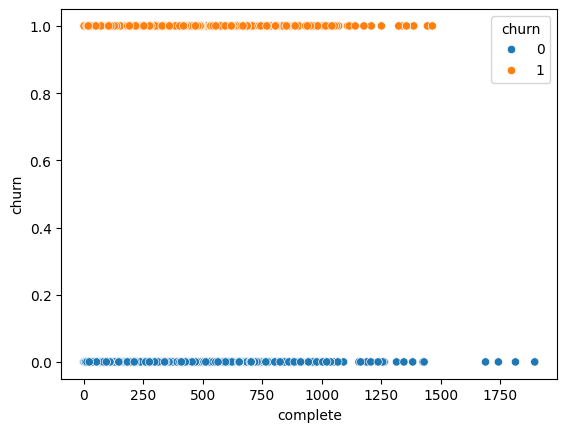

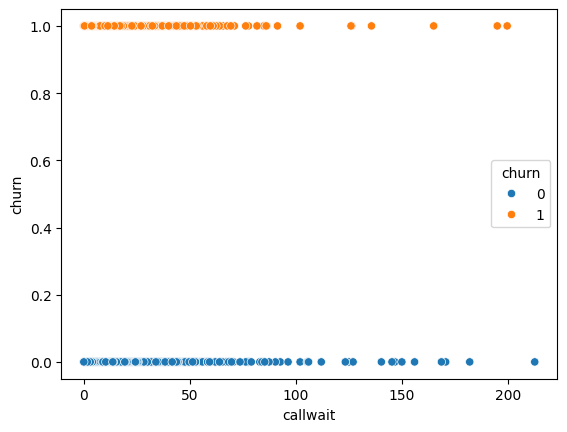

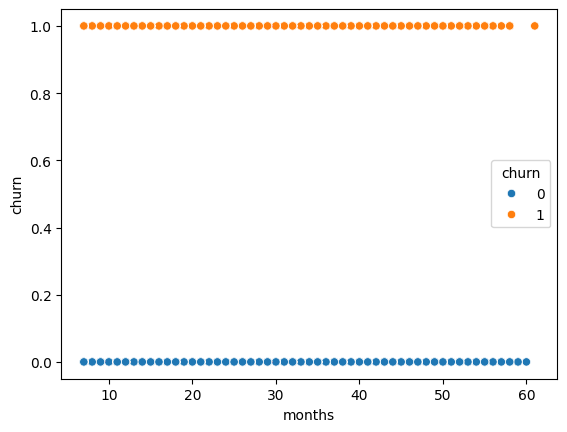

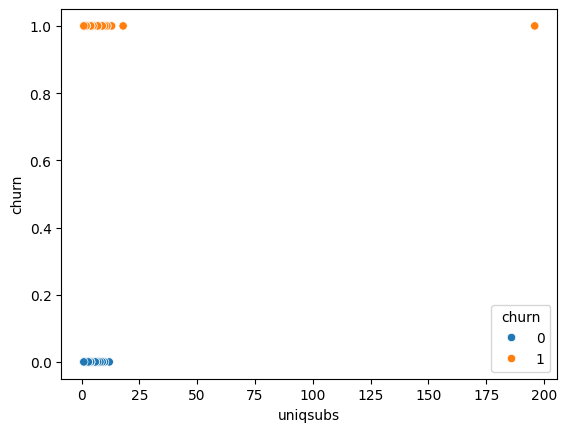

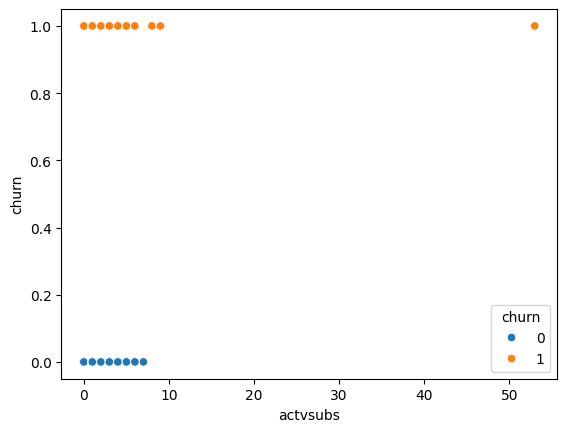

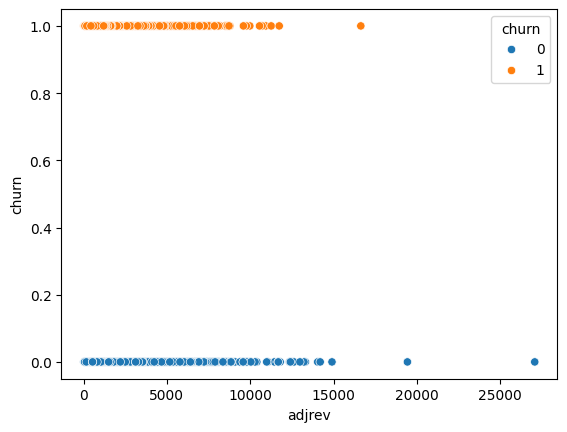

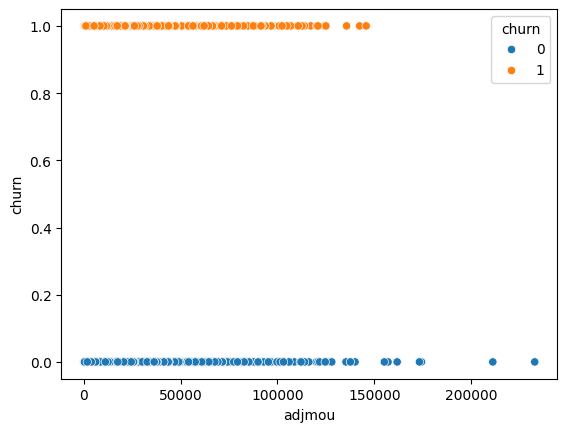

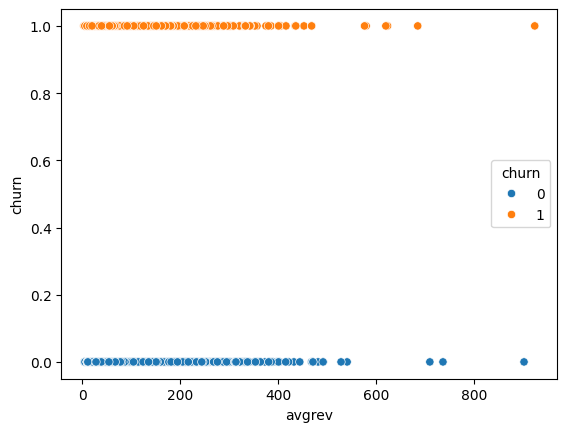

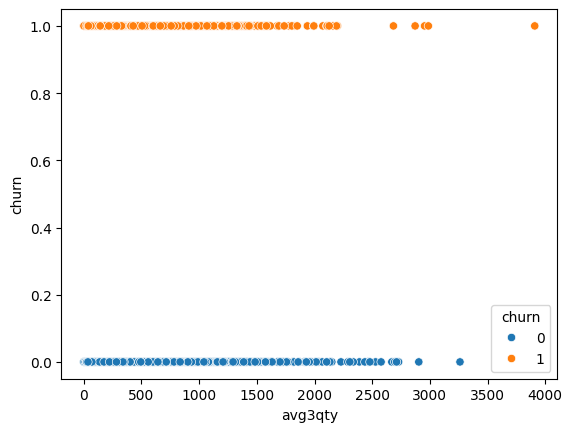

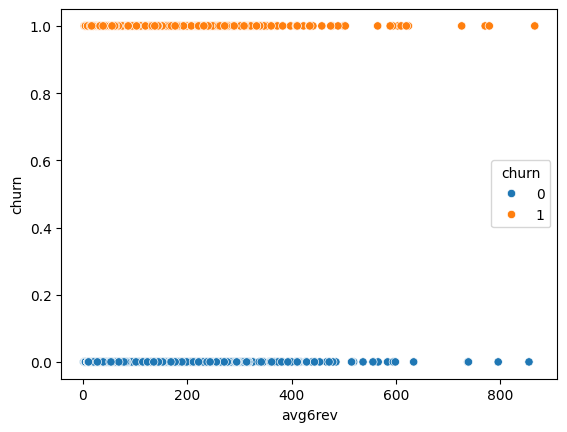

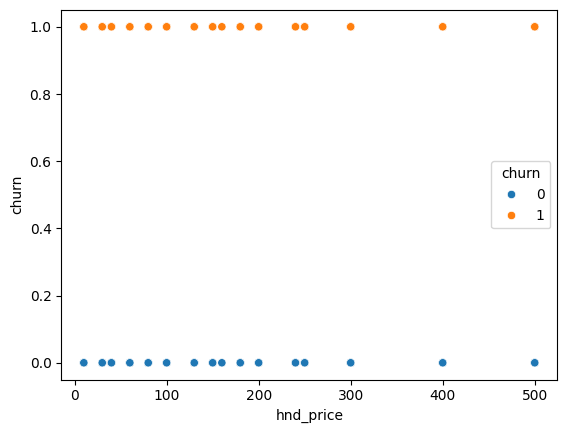

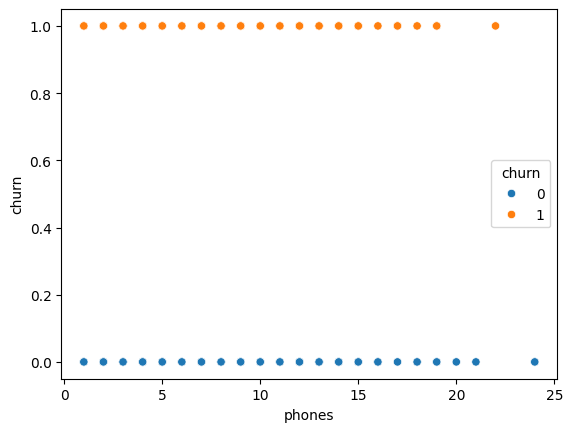

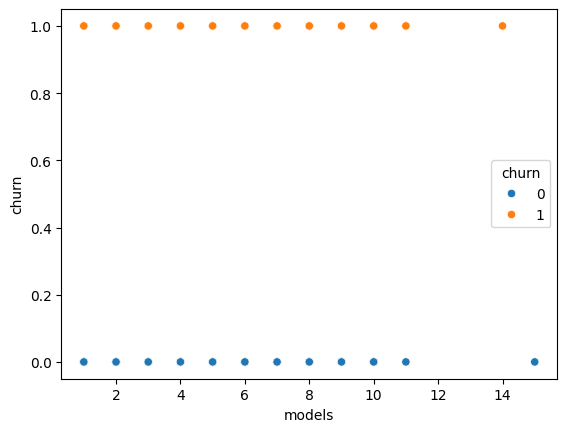

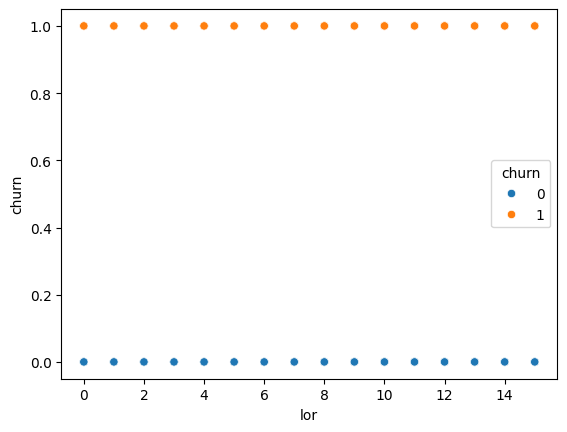

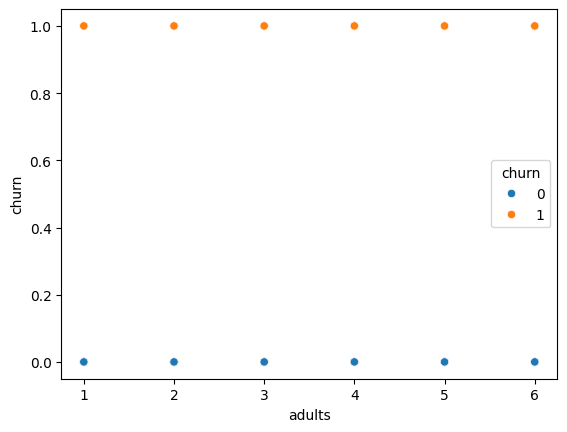

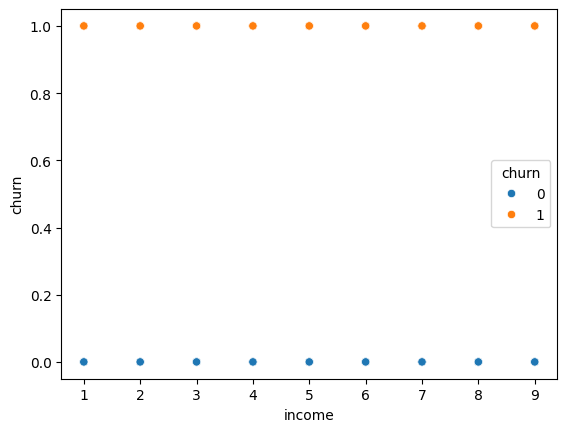

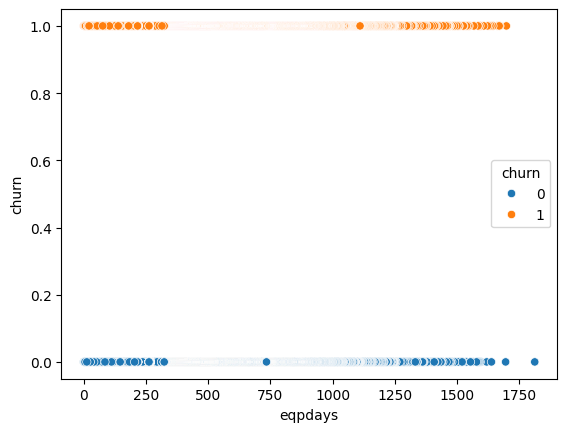

In [ ]:
for i in l_numericas:
    sns.scatterplot(data=df, x=i, y='churn', hue="churn")
    plt.show()

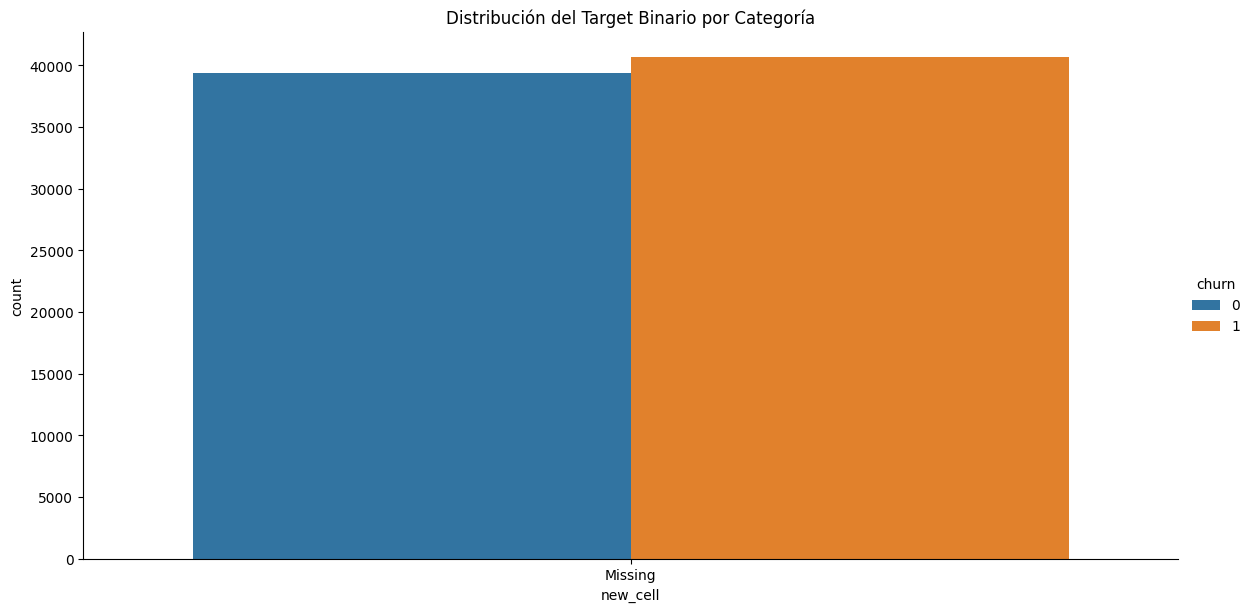

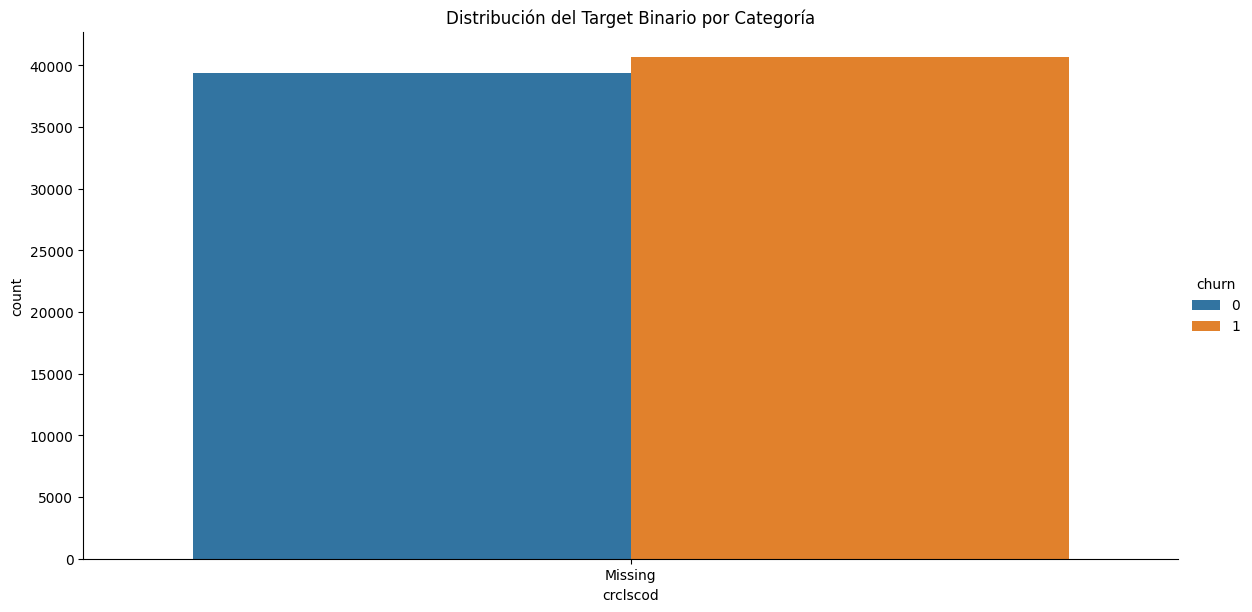

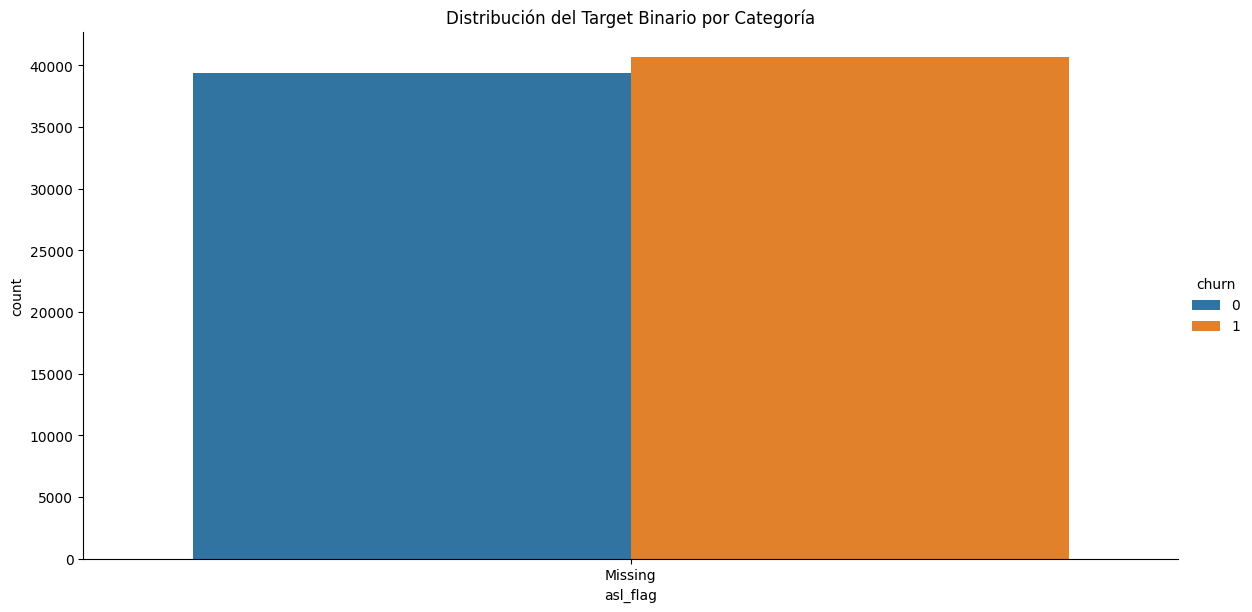

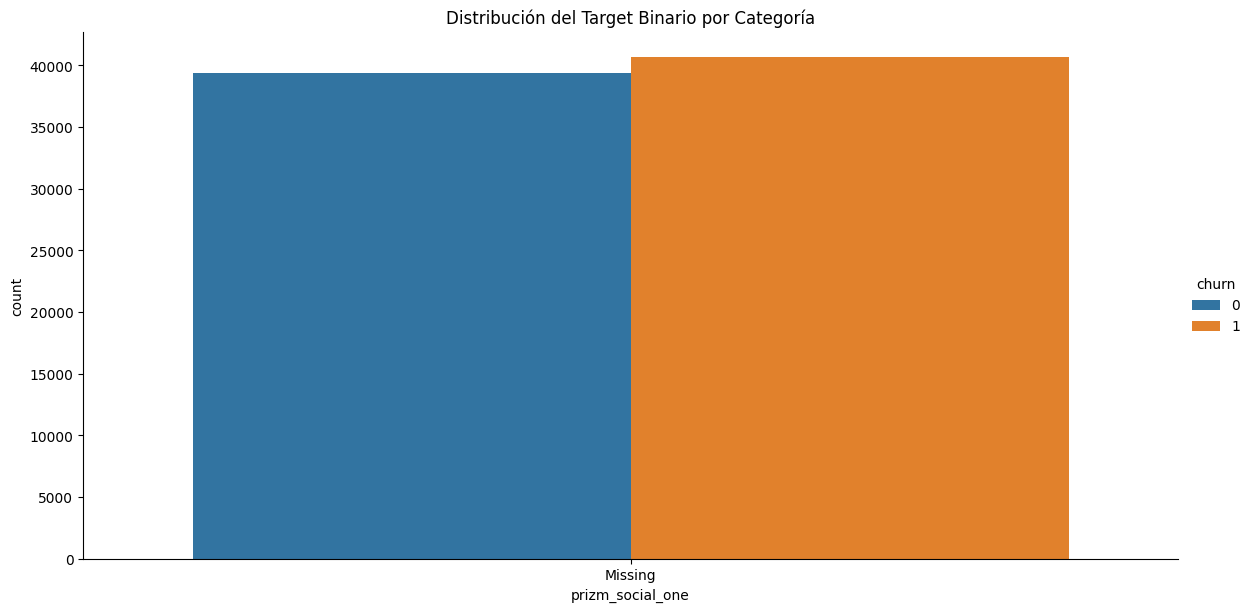

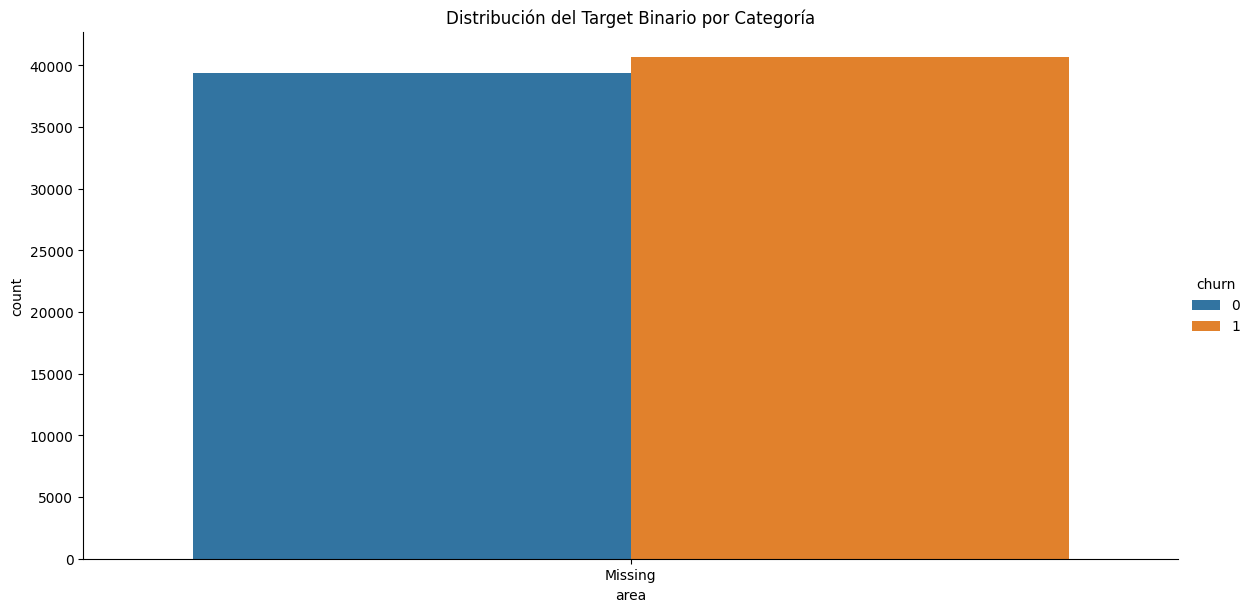

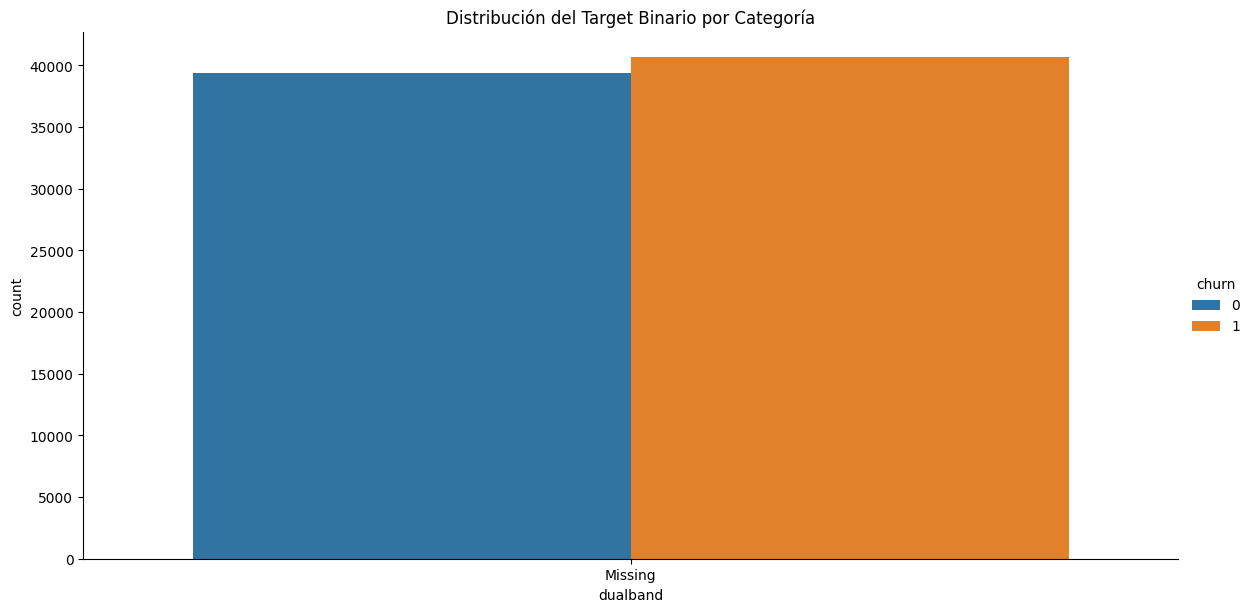

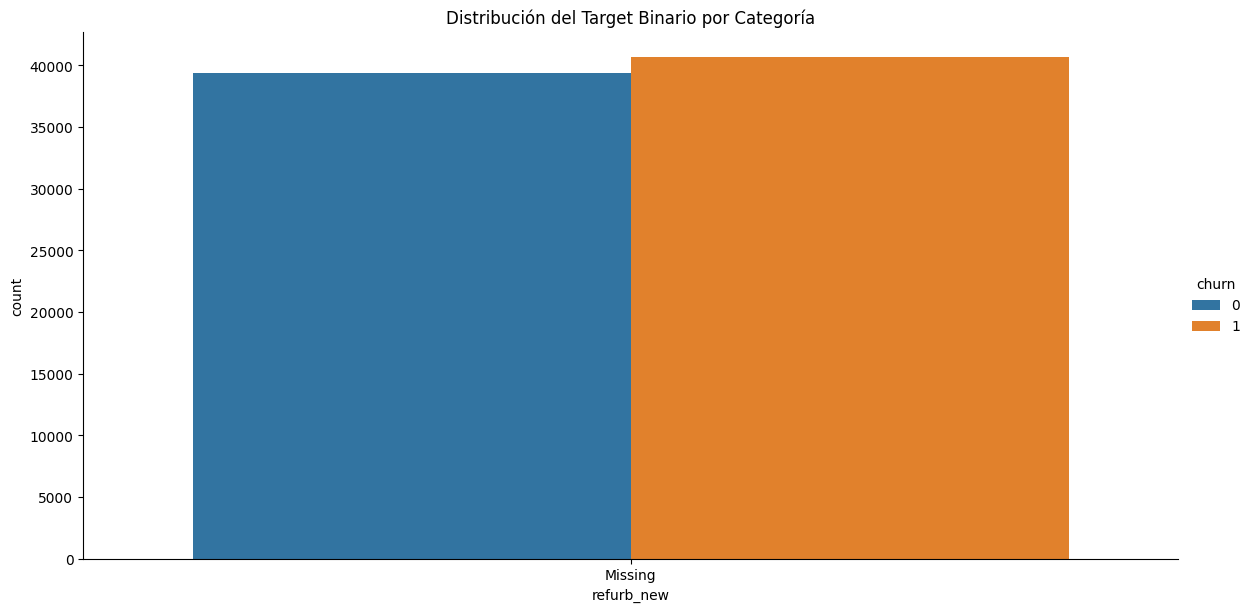

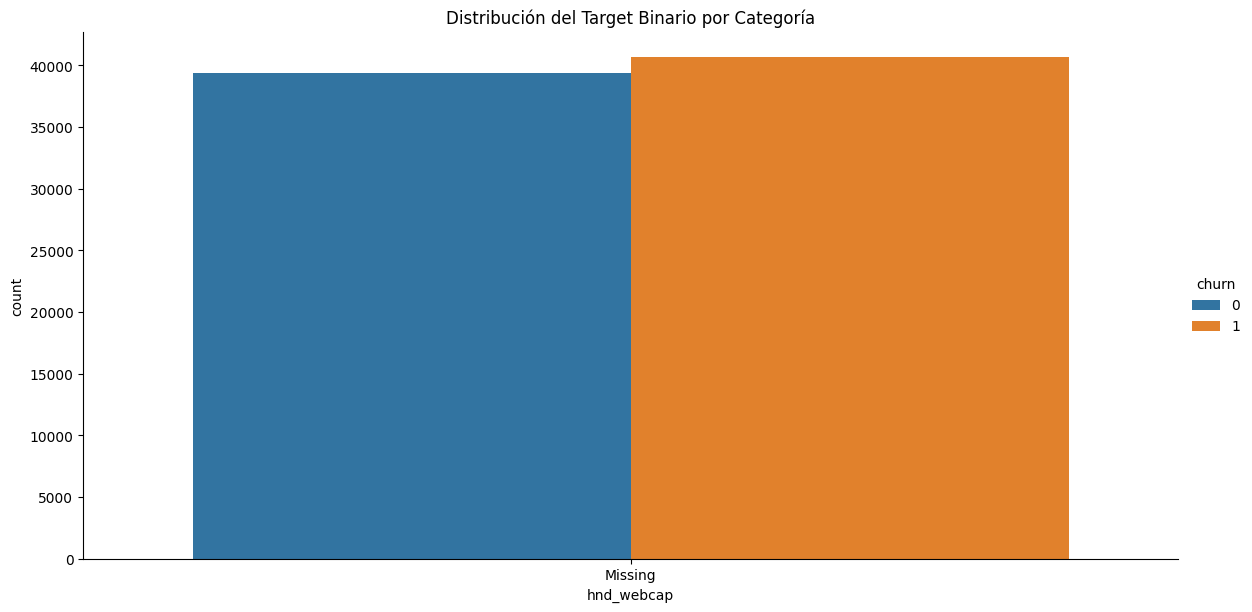

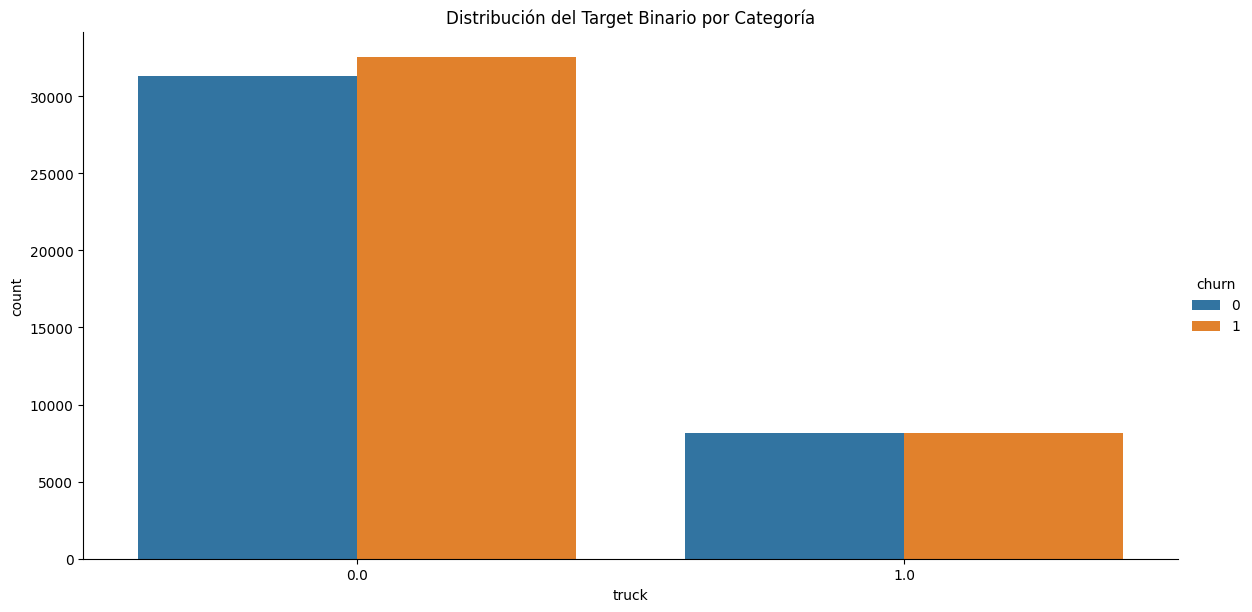

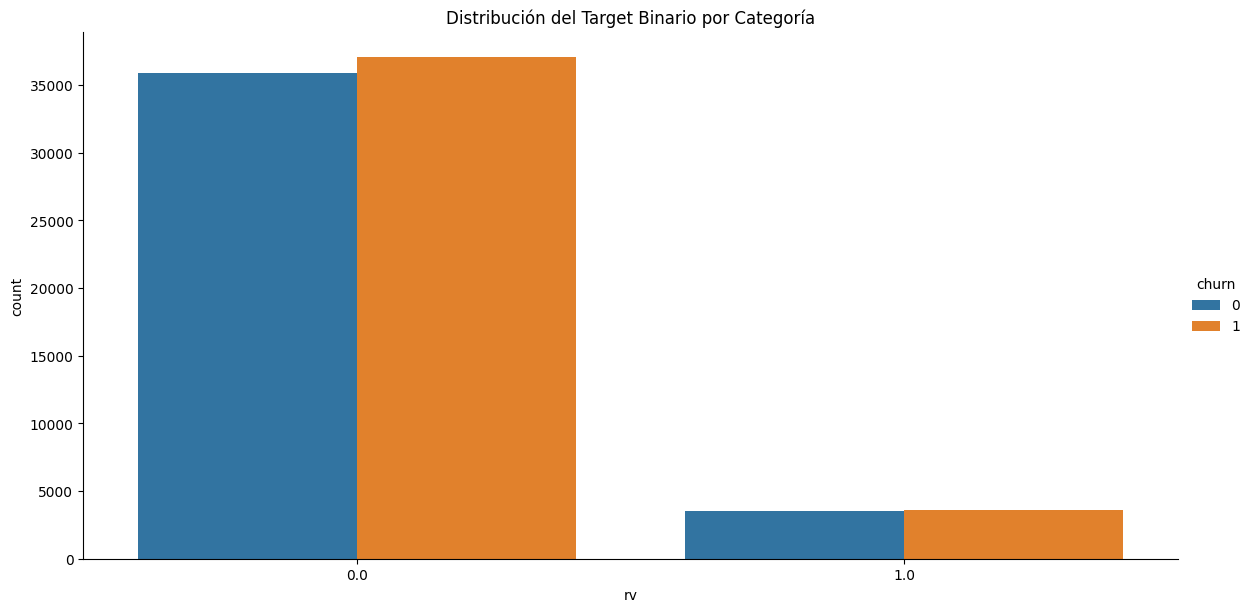

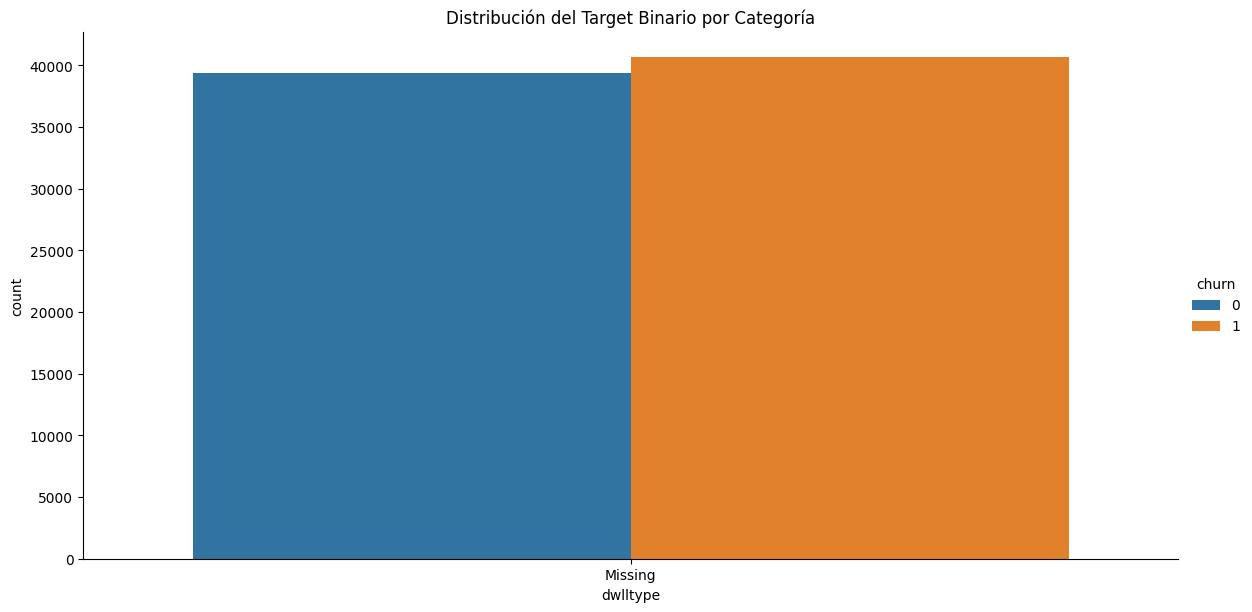

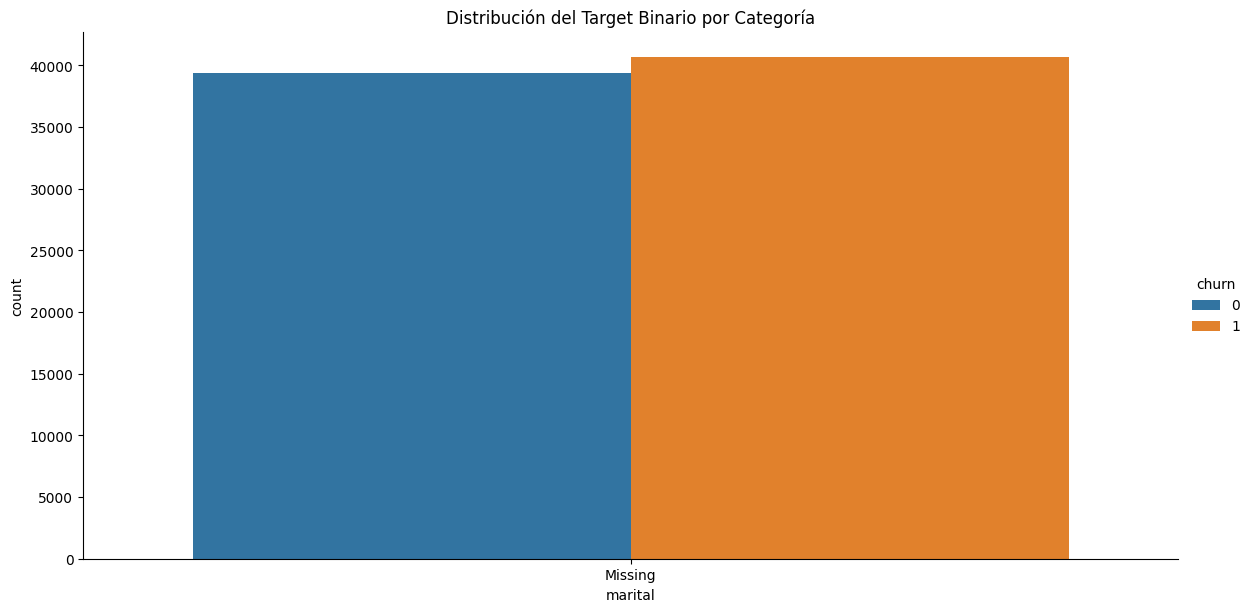

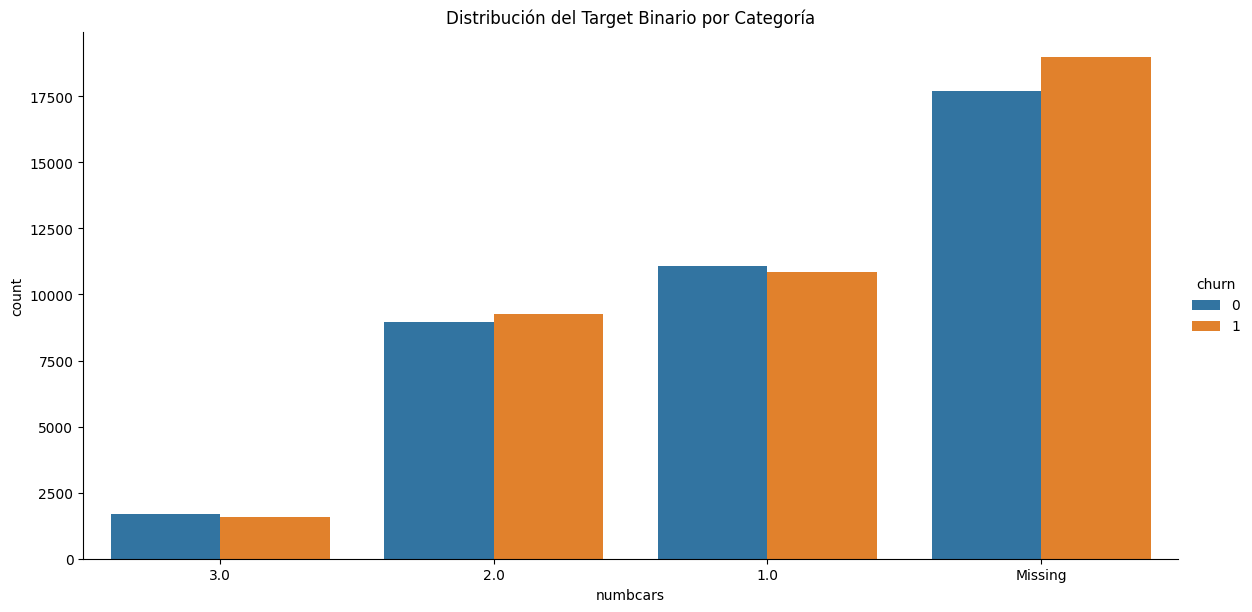

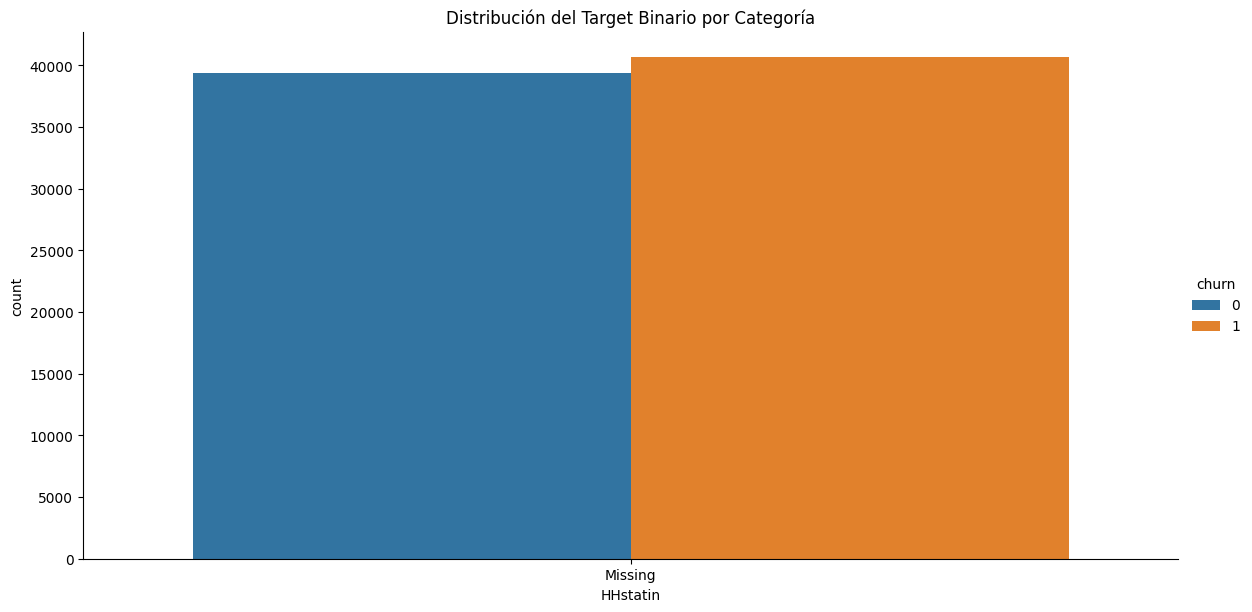

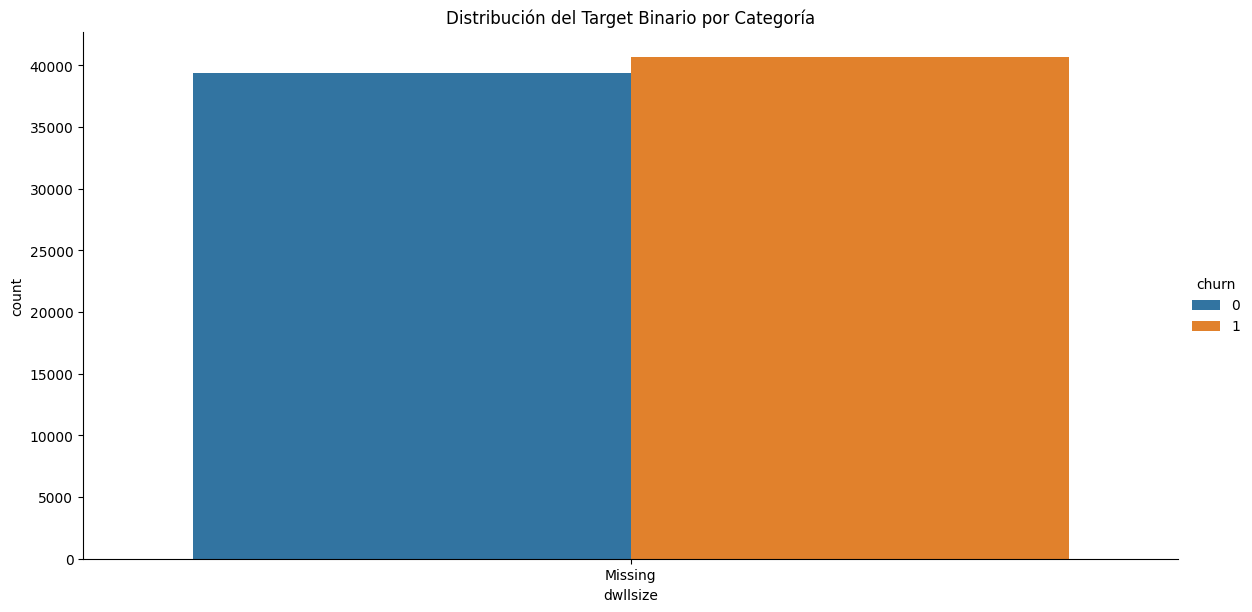

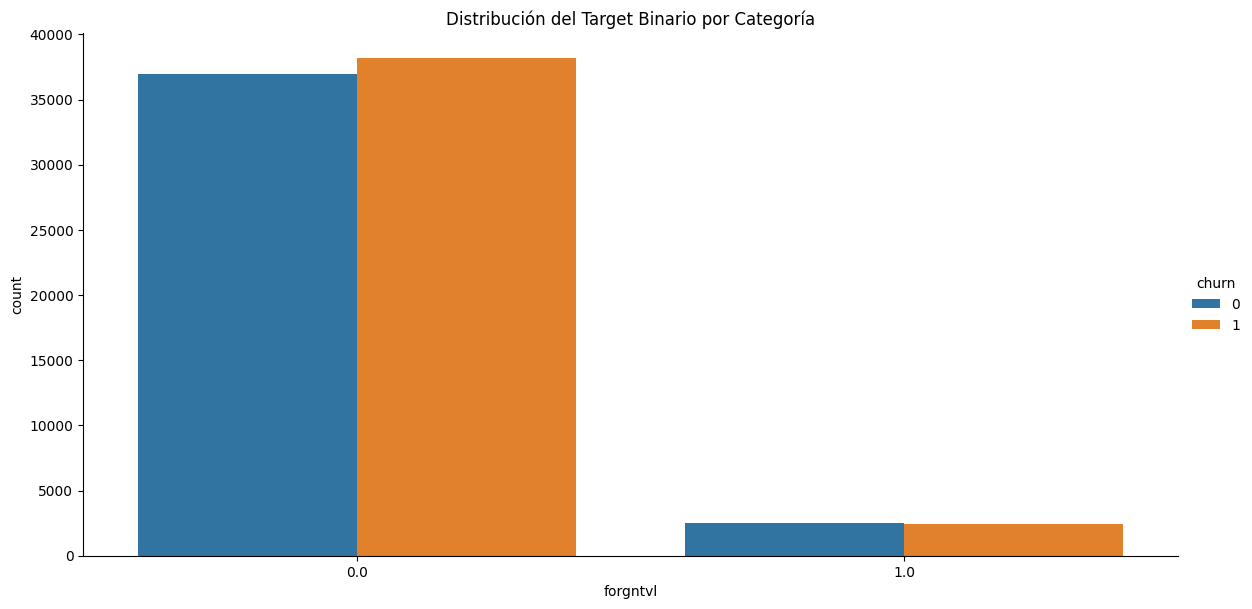

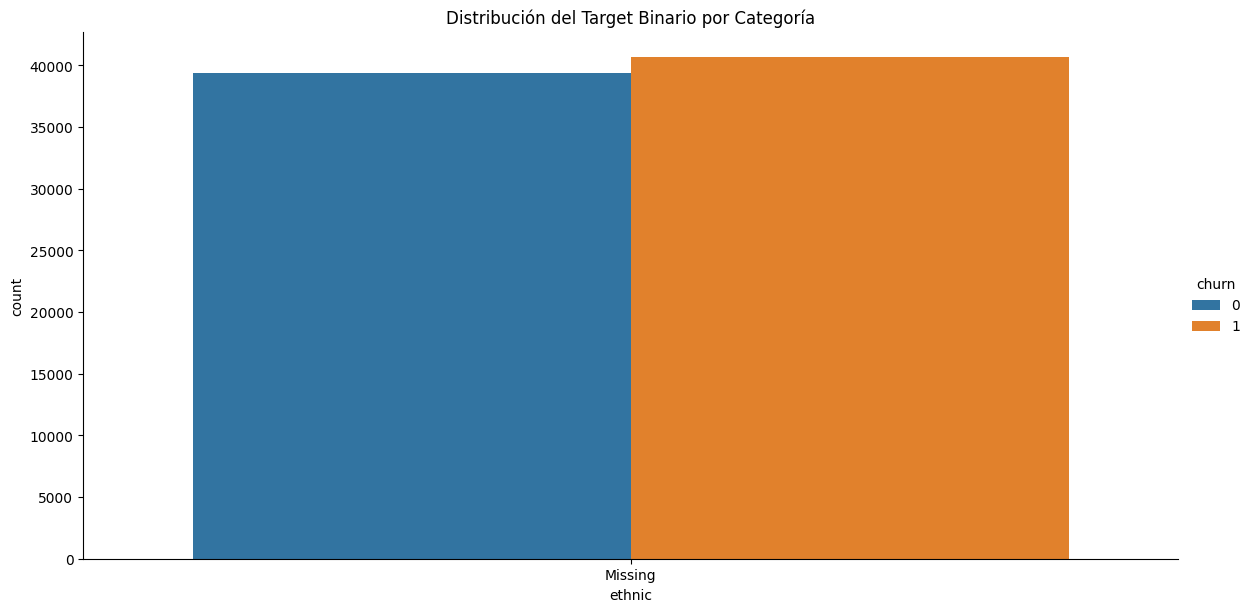

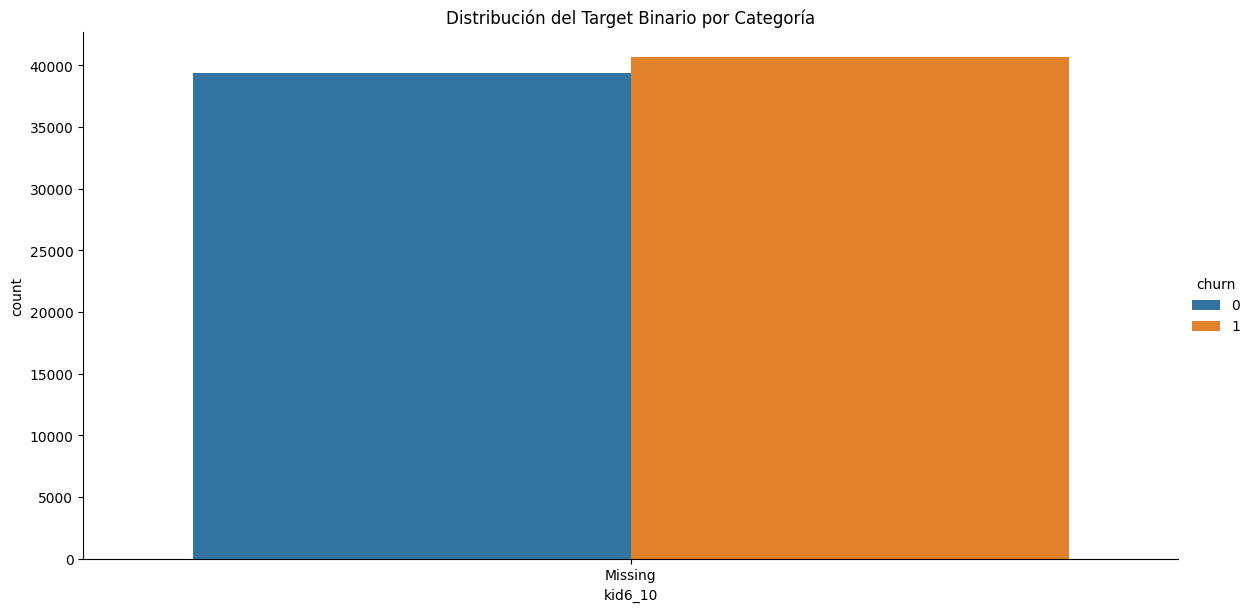

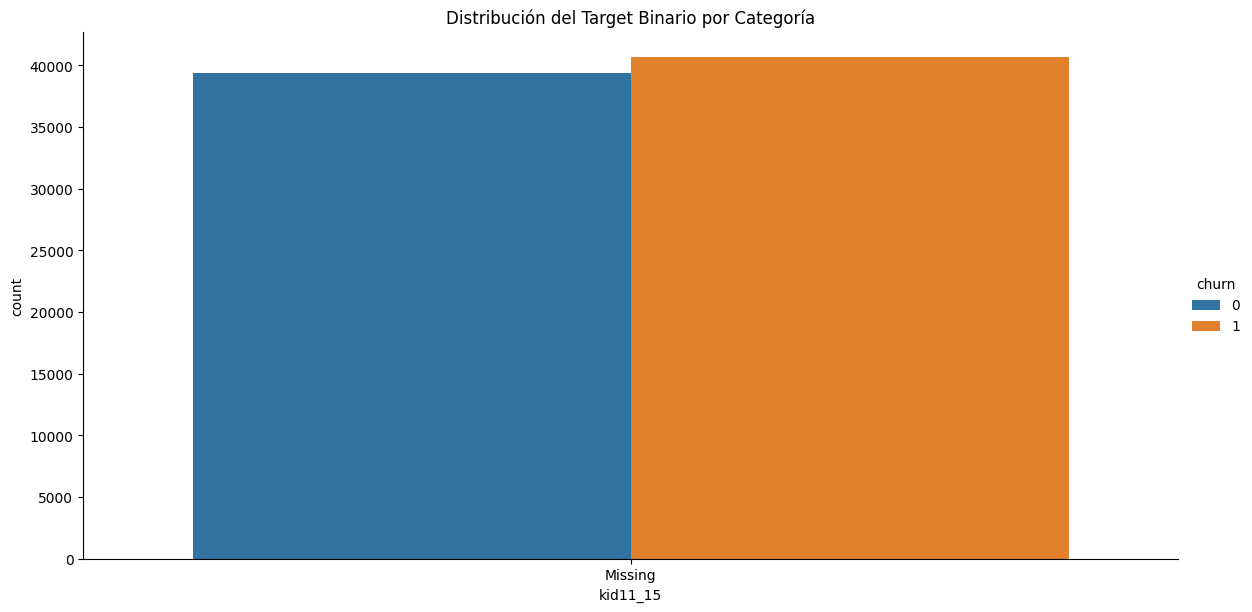

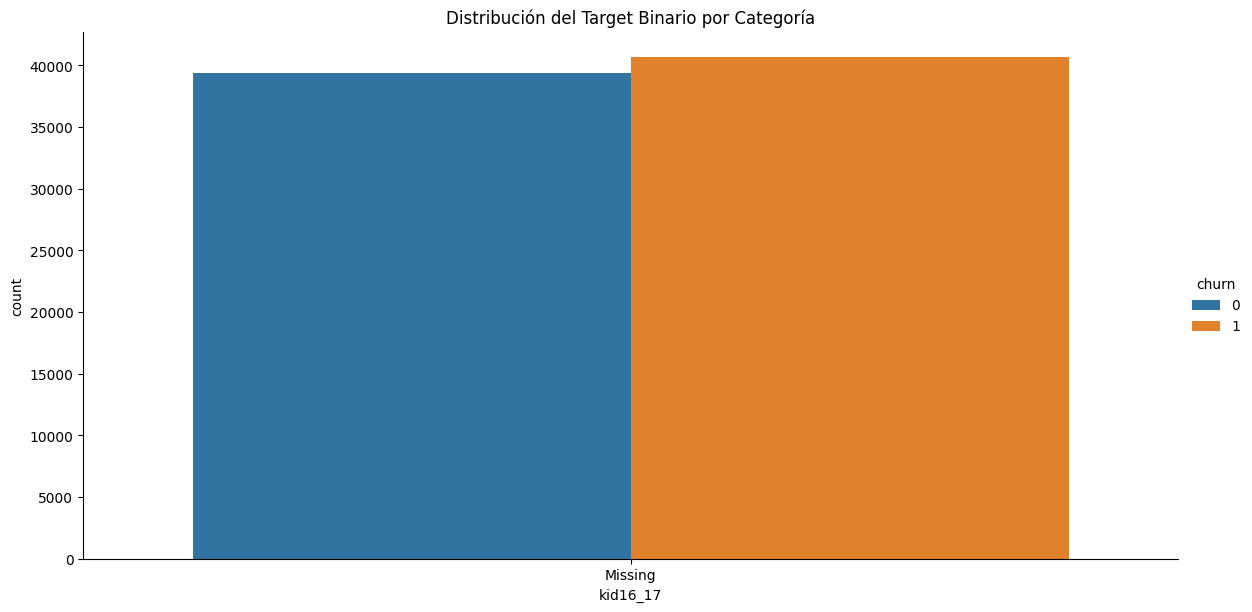

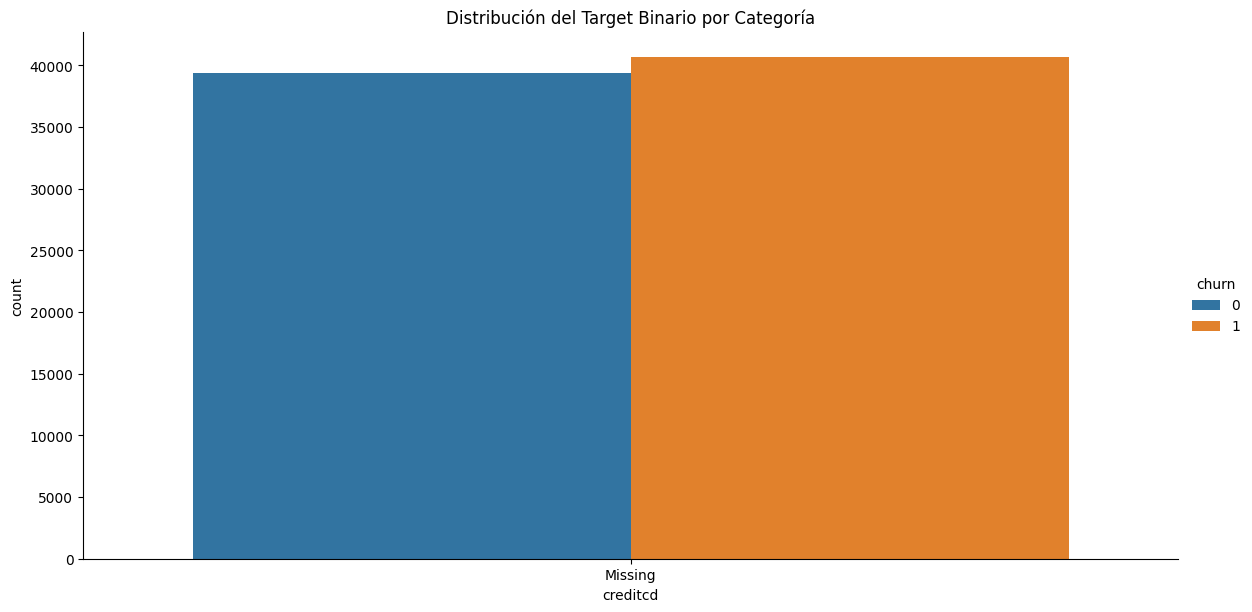

In [ ]:
for i in l_categoricas:
  sns.catplot(x=i, hue="churn", data=df, kind="count", height=6, aspect=2)
  plt.title("Distribución del Target Binario por Categoría")
  plt.show()

In [ ]:
df.drop(df[df['mou']>10000].index, inplace=True)

In [ ]:
df.drop(df[df['da']>100].index, inplace=True)

In [ ]:
df.drop(df[df['datovr']>200].index, inplace=True)

In [ ]:
df[df['roam']>2000]

,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,blck_vce,...,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid6_10,kid11_15,kid16_17,creditcd,eqpdays


In [ ]:
df[df['change_mou']>10000]

,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,blck_vce,...,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid6_10,kid11_15,kid16_17,creditcd,eqpdays


In [ ]:
df[df['change_rev']>10000]

,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,blck_vce,...,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid6_10,kid11_15,kid16_17,creditcd,eqpdays


In [ ]:
df[df['change_mou']>10000]

In [ ]:
df.drop(df[df['recv_vce']>2500].index, inplace=True)

In [ ]:
df.drop(df[df['custcare']>400].index, inplace=True)

In [ ]:
df[df['ccrndmou']>600]

,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,blck_vce,...,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid6_10,kid11_15,kid16_17,creditcd,eqpdays


In [ ]:
df.drop(df[df['threeway']>50].index, inplace=True)

In [ ]:
df.drop(df[df['mou_cdat']>2000].index, inplace=True)

In [ ]:
df.drop(df[df['mouowylisv']>1000].index, inplace=True)

In [ ]:
df.drop(df[df['iwylis_vce']>400].index, inplace=True)

In [ ]:
df.drop(df[df['mouiwylisv']>1000].index, inplace=True)

In [ ]:
df.drop(df[df['mou_pead']>500].index, inplace=True)

In [ ]:
df.drop(df[df['uniqsubs']>50].index, inplace=True)

In [ ]:
df[df['actvsubs']>20]

,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,blck_vce,...,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid6_10,kid11_15,kid16_17,creditcd,eqpdays


In [ ]:
df[df['adjrev']>20000]

,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,blck_vce,...,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid6_10,kid11_15,kid16_17,creditcd,eqpdays


In [ ]:
df.drop(df[df['adjmou']>200000].index, inplace=True)

In [ ]:
df.drop(df[df['avg3qty']>3500].index, inplace=True)

In [ ]:
df.shape

(80088, 67)

In [ ]:
df.describe(include=np.number)

,mou,totmrc,da,vceovr,datovr,roam,change_mou,change_rev,drop_vce,blck_vce,...,hnd_price,phones,models,truck,rv,lor,adults,income,forgntvl,eqpdays
count,80088.000000,80088.000000,80088.000000,80088.000000,80088.000000,80088.000000,80088.000000,80088.000000,80088.000000,80088.000000,...,80088.000000,80088.000000,80088.000000,80088.000000,80088.000000,80088.000000,80088.000000,80088.000000,80088.000000,80088.000000
mean,496.888915,45.702813,0.862648,12.747102,0.225590,1.218413,-14.173952,-1.168510,5.713682,3.907160,...,99.115702,1.802143,1.556063,0.203239,0.089589,6.207834,2.645228,5.869007,0.061832,409.034587
std,506.977425,23.170931,2.077347,28.949354,2.330833,9.220996,246.618599,37.462887,8.571463,10.480496,...,60.814248,1.316852,0.900304,0.402411,0.285594,4.743967,1.320167,1.923788,0.240852,252.755409
min,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,-3406.500000,-1107.740000,0.000000,0.000000,...,9.989998,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,146.750000,30.000000,0.000000,0.000000,0.000000,0.000000,-84.500000,-6.961250,0.666667,0.000000,...,29.989990,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,5.000000,0.000000,238.000000
50%,344.000000,44.990000,0.247500,0.525000,0.000000,0.000000,-6.500000,-0.310000,3.000000,1.000000,...,99.989990,1.000000,1.000000,0.000000,0.000000,5.000000,3.000000,6.000000,0.000000,365.000000
75%,676.500000,59.990000,0.742500,13.200000,0.000000,0.250000,60.000000,1.485000,7.333333,3.333333,...,149.989990,2.000000,2.000000,0.000000,0.000000,9.000000,3.000000,7.000000,0.000000,556.000000
max,6114.750000,409.990000,72.765000,896.087500,162.630000,1112.447500,4480.000000,1724.390000,232.666667,385.333333,...,499.989990,24.000000,15.000000,1.000000,1.000000,15.000000,6.000000,9.000000,1.000000,1812.000000


In [ ]:
df.describe(include=object).columns

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'dwlltype', 'marital',
       'numbcars', 'HHstatin', 'dwllsize', 'ethnic', 'kid6_10', 'kid11_15',
       'kid16_17', 'creditcd'],
      dtype='object')

In [ ]:
df['new_cell'].value_counts(normalize=True)*100

new_cell
U    65.058436
Y    20.288932
N    14.652632
Name: proportion, dtype: float64

In [ ]:
df['area'].value_counts(normalize=True)*100

area
NEW YORK CITY AREA               11.744581
DC/MARYLAND/VIRGINIA AREA         6.556538
MIDWEST AREA                      6.545300
CALIFORNIA NORTH AREA             6.088303
ATLANTIC SOUTH AREA               6.035861
NEW ENGLAND AREA                  5.732444
DALLAS AREA                       5.696234
SOUTHWEST AREA                    5.483968
CHICAGO AREA                      5.322895
LOS ANGELES AREA                  5.093148
GREAT LAKES AREA                  4.927080
OHIO AREA                         4.774748
NORTHWEST/ROCKY MOUNTAIN AREA     4.323994
NORTH FLORIDA AREA                4.317750
HOUSTON AREA                      4.247827
CENTRAL/SOUTH TEXAS AREA          4.216612
SOUTH FLORIDA AREA                3.468684
TENNESSEE AREA                    2.846868
PHILADELPHIA AREA                 2.577165
Name: proportion, dtype: float64

In [ ]:
df['prizm_social_one'].value_counts(normalize=True)*100

prizm_social_one
S    35.010239
U    25.062431
C    18.187494
T    16.480621
R     5.259215
Name: proportion, dtype: float64

In [ ]:
df["crclscod"].value_counts(normalize=True).cumsum()

crclscod
AA    0.384340
A     0.562893
BA    0.686982
CA    0.767381
EA    0.828139
B     0.870418
DA    0.905192
ZA    0.939741
C     0.955761
A2    0.964489
U     0.969072
E     0.972742
GA    0.975652
E4    0.978549
G     0.981208
D     0.983843
JF    0.985965
Z     0.988026
M     0.989749
C2    0.991335
I     0.992471
D4    0.993470
W     0.994344
Z4    0.995180
U1    0.995792
EM    0.996329
V1    0.996828
B2    0.997266
EC    0.997528
O     0.997777
J     0.998015
E2    0.998227
CY    0.998427
D5    0.998614
CC    0.998789
K     0.998964
C5    0.999138
Z1    0.999263
Y     0.999376
ZY    0.999488
Z5    0.999588
H     0.999663
D2    0.999725
TP    0.999788
GY    0.999838
A3    0.999875
Z2    0.999913
EF    0.999938
IF    0.999963
V     0.999975
P1    0.999988
ZF    1.000000
Name: proportion, dtype: float64

In [ ]:
df['asl_flag'].value_counts(normalize=True)*100

asl_flag
N    88.892219
Y    11.107781
Name: proportion, dtype: float64

In [ ]:
df['dualband'].value_counts(normalize=True)*100

dualband
Y    73.786335
N    22.485266
T     3.728399
Name: proportion, dtype: float64

In [ ]:
df['refurb_new'].value_counts(normalize=True)*100

refurb_new
N    84.899111
R    15.100889
Name: proportion, dtype: float64

In [ ]:
df['hnd_webcap'].value_counts(normalize=True)*100

hnd_webcap
WCMB    75.067426
WC      14.095745
sin     10.836829
Name: proportion, dtype: float64

In [ ]:
df['dwlltype'].value_counts(normalize=True)*100

dwlltype
S    71.757317
M    28.242683
Name: proportion, dtype: float64

In [ ]:
df['marital'].value_counts(normalize=True)*100

marital
U    35.564629
M    33.272151
S    18.478424
B     7.232045
A     5.452752
Name: proportion, dtype: float64

In [ ]:
df['numbcars'].value_counts(normalize=True)*100

numbcars
sin    45.783388
1.0    27.403606
2.0    22.720008
3.0     4.092998
Name: proportion, dtype: float64

In [ ]:
df['HHstatin'].value_counts(normalize=True)*100

HHstatin
C    63.359055
I    20.373839
A     7.129657
B     5.001998
G     2.725752
H     1.409699
Name: proportion, dtype: float64

In [ ]:
df['dwllsize'].value_counts(normalize=True)*100

dwllsize
A    76.407202
B     8.531865
C     2.436070
J     2.299970
O     1.937868
N     1.674408
D     1.251124
K     1.088802
E     0.864050
L     0.776646
F     0.665518
M     0.599341
G     0.568125
H     0.474478
I     0.424533
Name: proportion, dtype: float64

In [ ]:
df['ethnic'].value_counts(normalize=True)*100

ethnic
N    34.169913
H    13.487664
S    13.111827
U    11.293827
G     6.156977
Z     4.511288
O     4.402657
I     4.031815
J     2.999201
F     2.167616
B     1.420937
R     1.052592
D     0.925232
M     0.153581
P     0.109879
X     0.004995
Name: proportion, dtype: float64

In [ ]:
df['creditcd'].value_counts(normalize=True)*100

creditcd
Y    71.806013
N    28.193987
Name: proportion, dtype: float64